# Credit Card Fraud Detection
- To detect fraudulent transactions that may occur in banks.

*Let's start by importing some libraries first*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

*Let's now import the data as follows...*

In [3]:
data = pd.read_csv('creditcard.csv')

*Let's now carry out the basic inspection as follows...*

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

- All the data is given in terms of numbers.
- Two understandable input columns are named as `Time` and `Amount`.
- Rest of the input columns have no meaning.

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- No missing values present.

In [7]:
data.shape

(284807, 31)

*Let's carry out some visualization of the data as follows.*

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

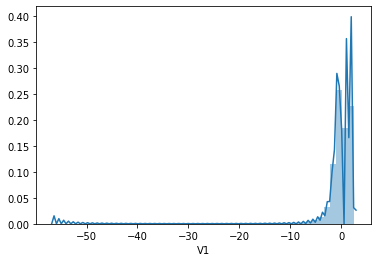

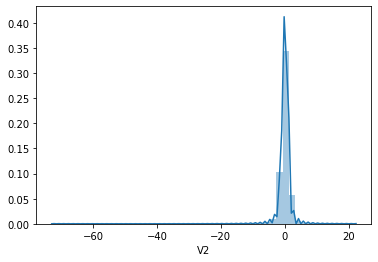

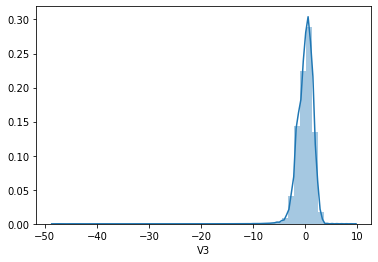

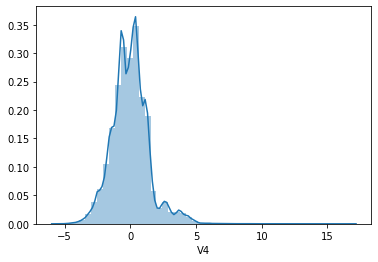

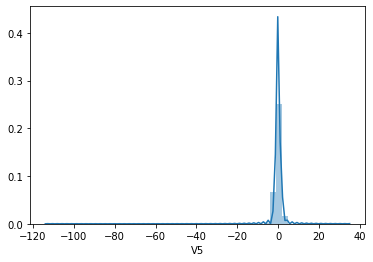

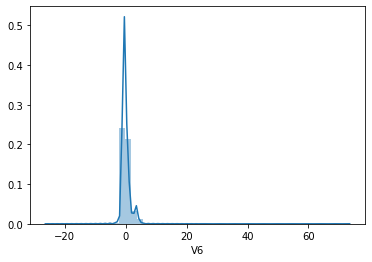

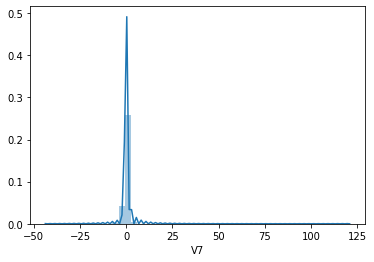

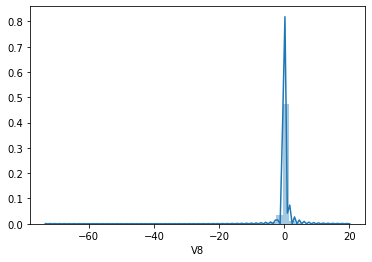

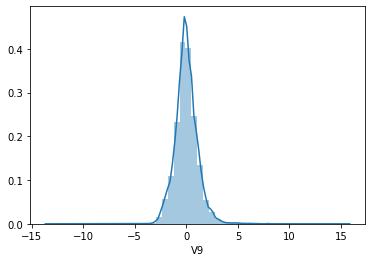

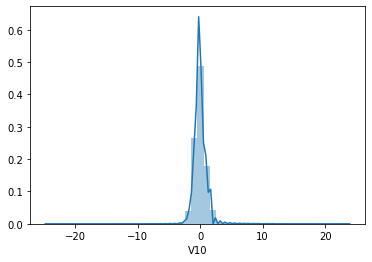

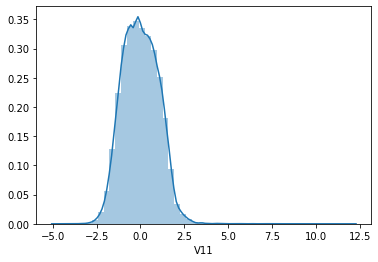

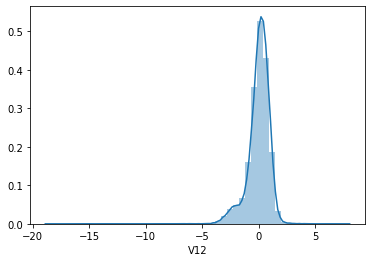

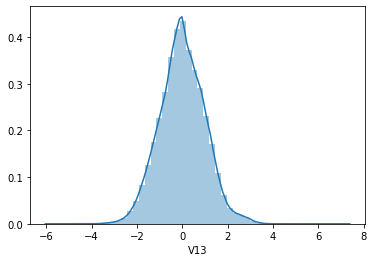

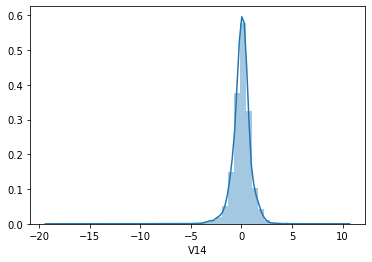

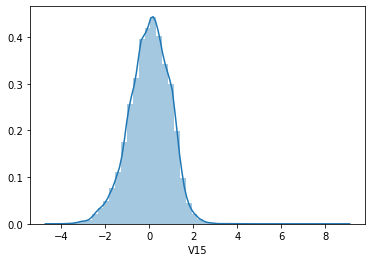

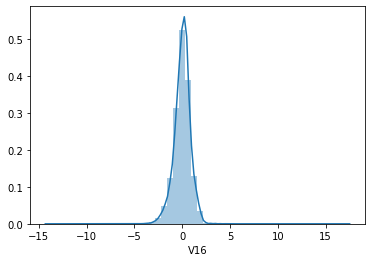

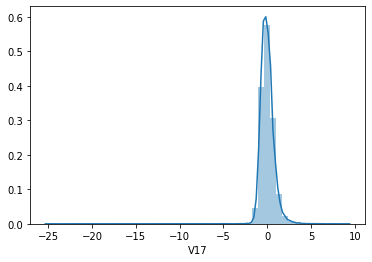

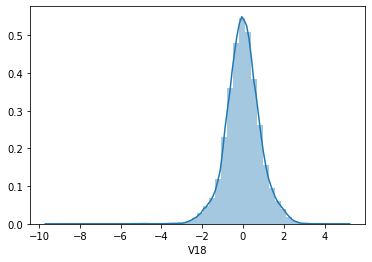

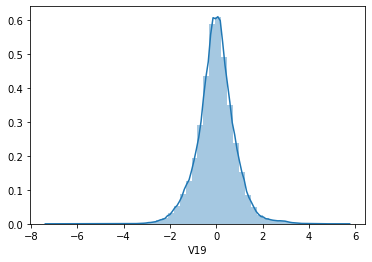

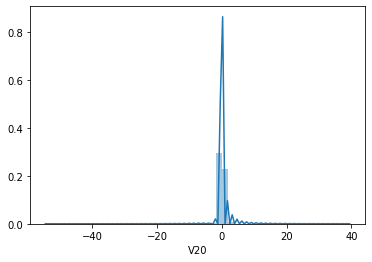

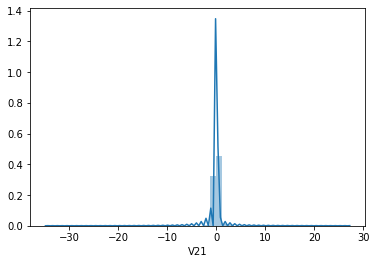

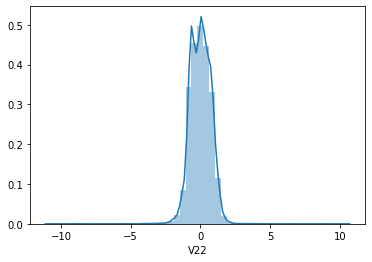

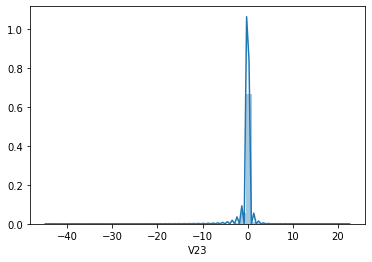

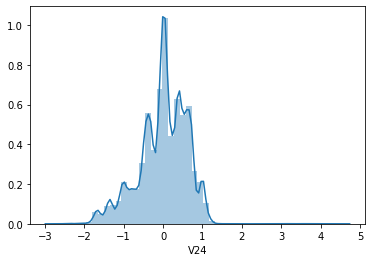

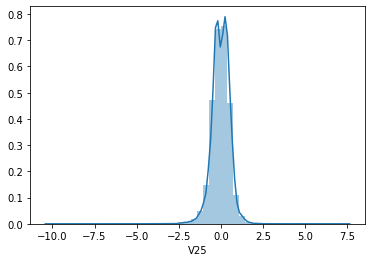

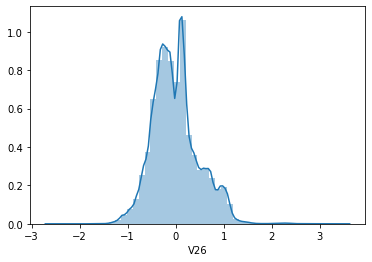

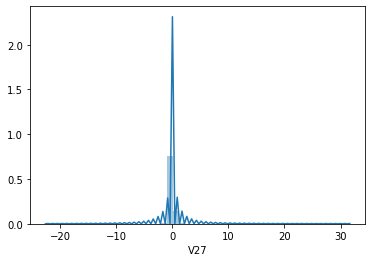

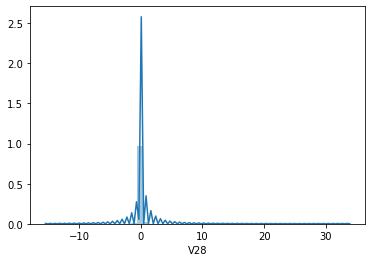

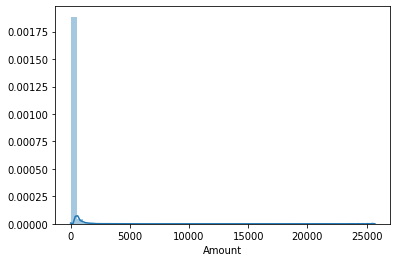

In [9]:
for i in data.columns[1:-1]:
    sns.distplot(data[i])
    plt.show()

- Skewness can be observed in some of the columns ranging from V1 to V28. Therefore, scaling is required.
- Amounts on the lower side is transacted most of the times. High value transactions are very less.

*Let's now plot the boxplots to observe the outliers, if any.*

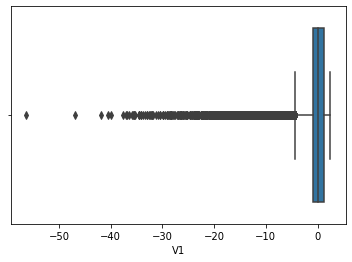

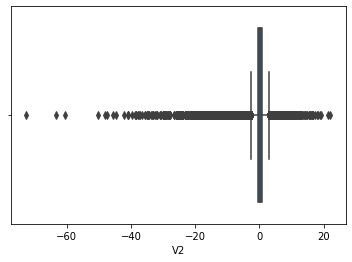

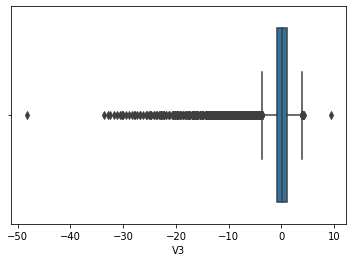

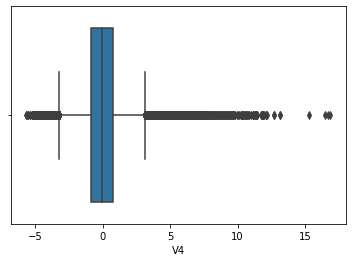

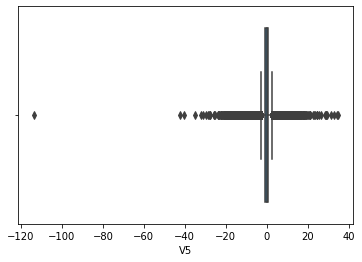

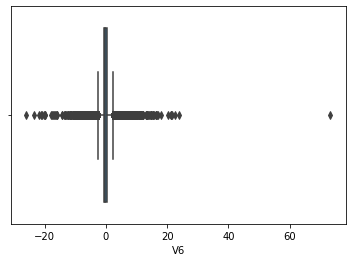

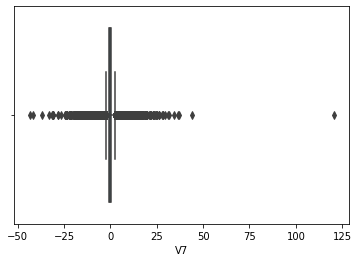

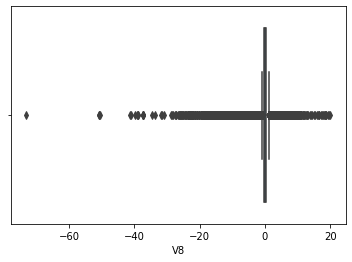

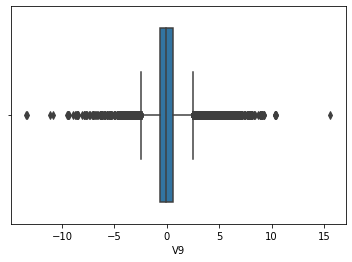

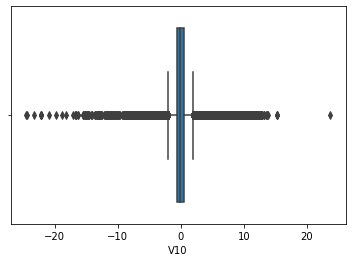

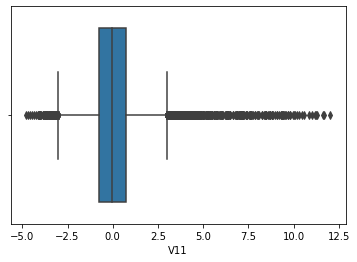

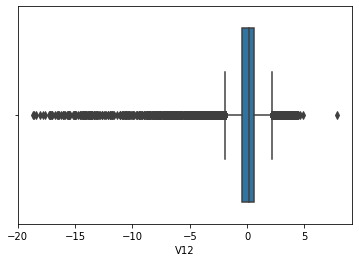

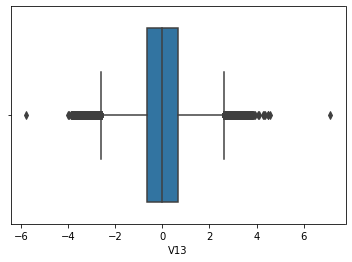

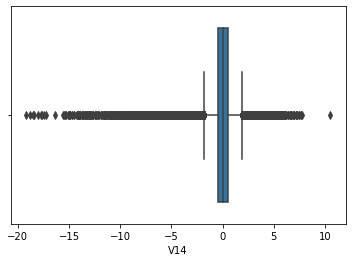

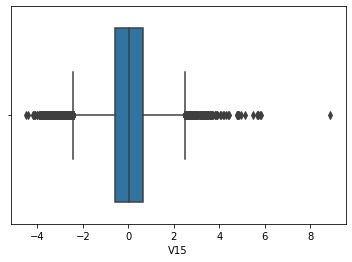

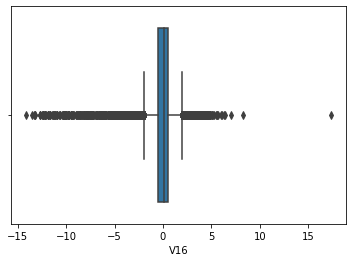

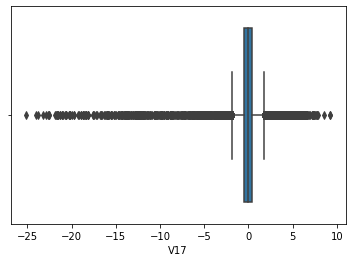

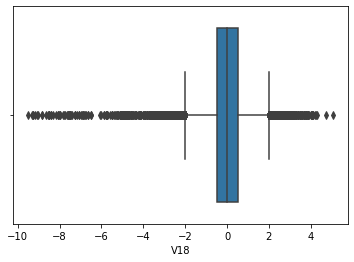

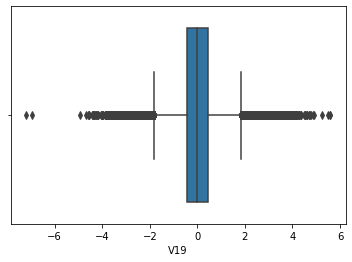

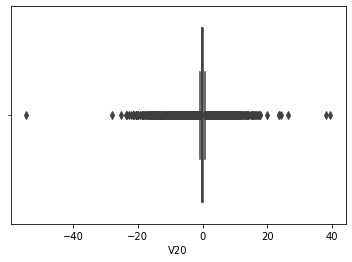

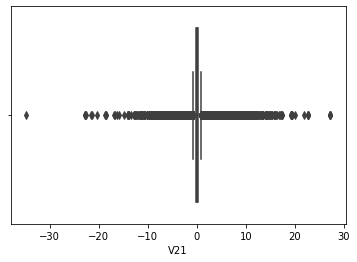

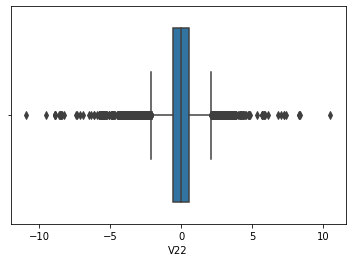

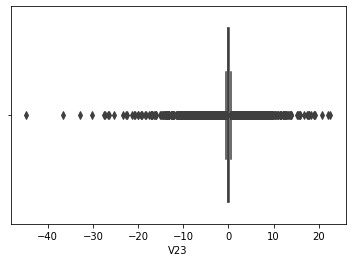

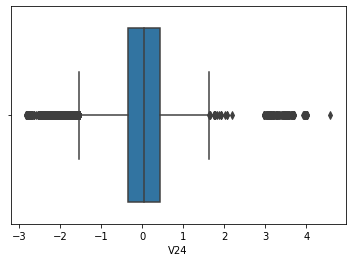

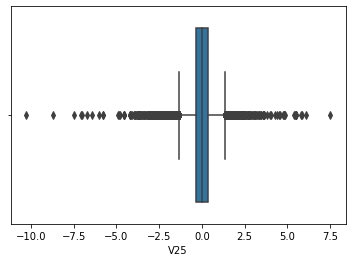

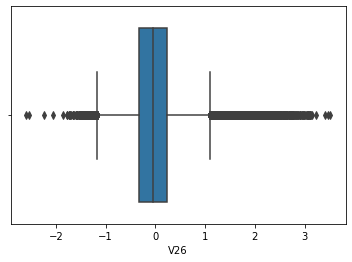

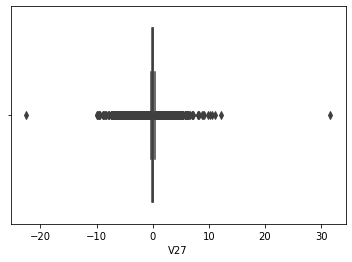

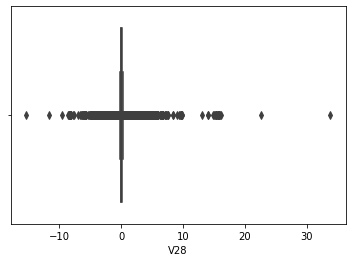

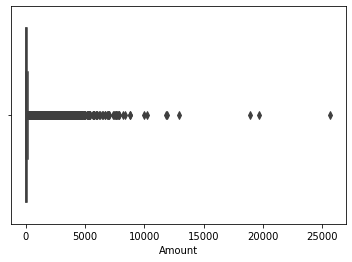

In [10]:
for i in data.columns[1:-1]:
    sns.boxplot(data[i])
    plt.show()

- High outliers can be observed in the columns but we won't be removing them.

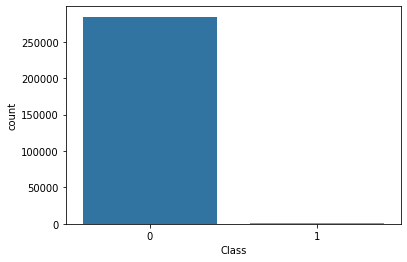

In [11]:
sns.countplot(data['Class'])
plt.show()

- Majority of the cases are non-fraudulent in nature.
- Only a miniscule number of transactions are fraudulent.

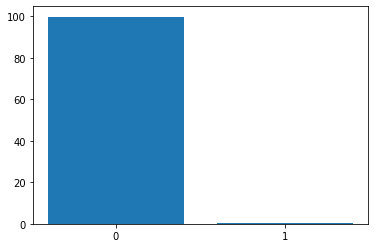

In [12]:
plt.bar(('0', '1'), 100*data['Class'].value_counts()/data.shape[0])
plt.show()

- Also in terms of Percentages, it can be observed that a huge class imbalance exists. It needs to be addressed before Model Building.

*Let's now make use of scatter plots as follows.*

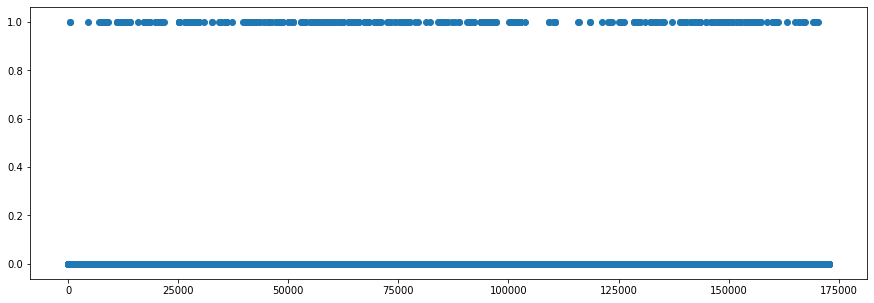

In [13]:
plt.figure(figsize = (15, 5))
plt.scatter(data['Time'], data['Class'])
plt.show()

- Not a significant insight present.
- It can be observed that the variable `Time` has no insight present. Therefore, its better to drop it.

In [14]:
data.drop('Time', axis = 1, inplace = True)

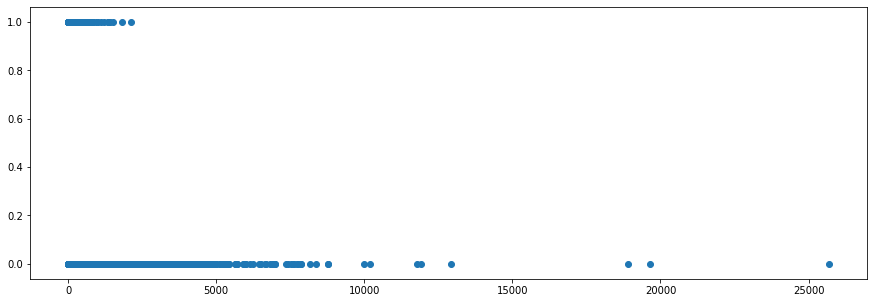

In [15]:
plt.figure(figsize = (15, 5))
plt.scatter(data['Amount'], data['Class'])
plt.show()

- It can be observed that the fraudulent transactions are under 5000 in terms of amount.
- There are no high value fraudulent transactions.

In [16]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- We have retained all the variables for now.

*Let's now split the data into train and test sets.*

In [17]:
X = data.iloc[:, :-1]
y = data['Class']

In [18]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

- From the plots above, Skewness was observed in some of the columns. In order to curb that, let's use `PowerTransformer`.

In [20]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
X_train[X_train.columns] = transformer.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = transformer.transform(X_test[X_test.columns])

*Let's now check whether we have been able to achieve gaussian curve.*

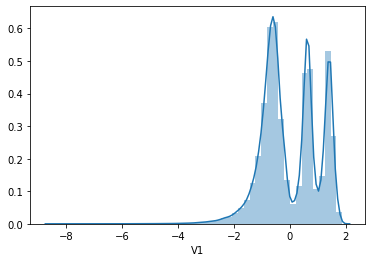

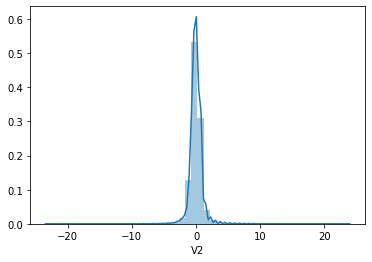

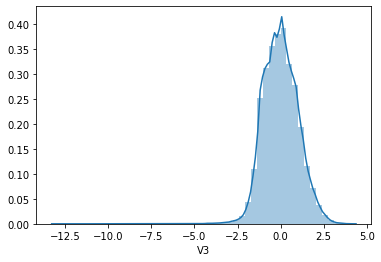

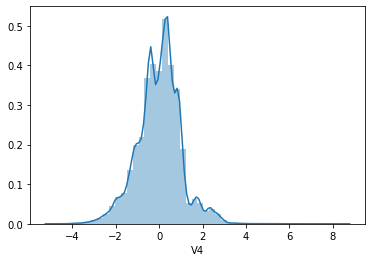

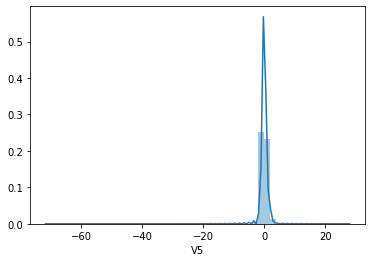

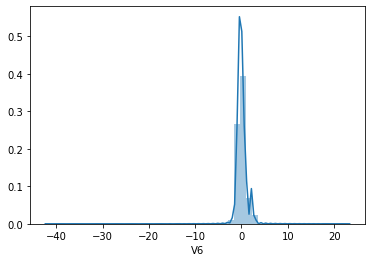

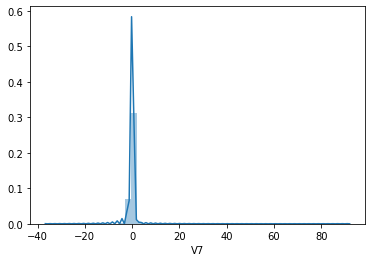

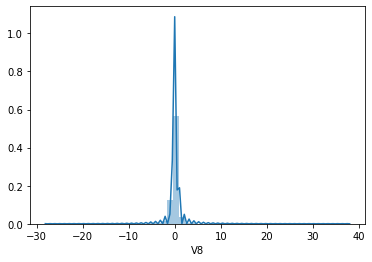

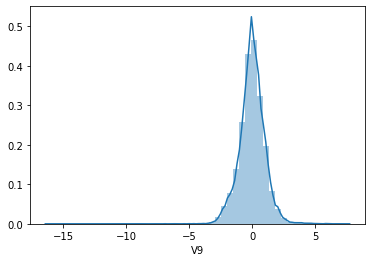

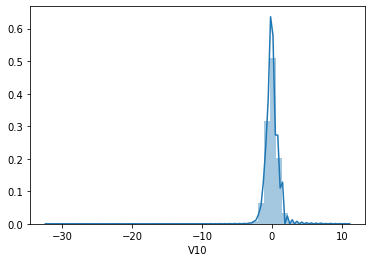

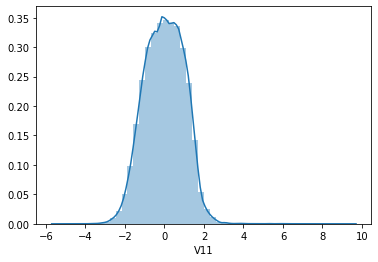

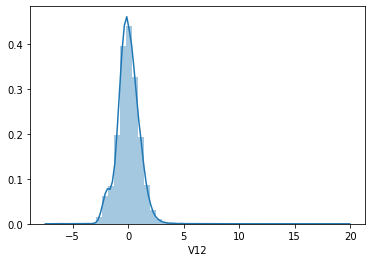

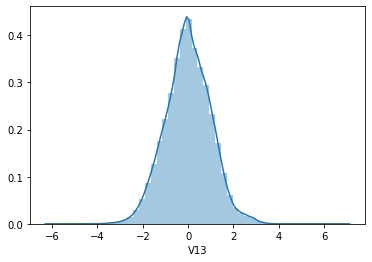

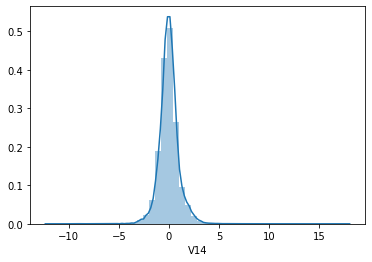

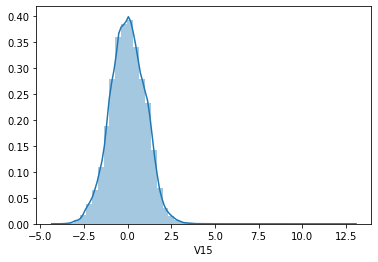

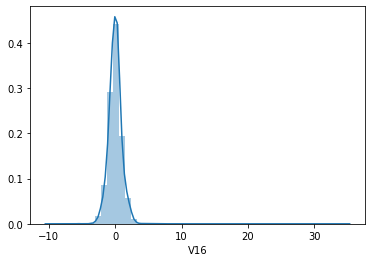

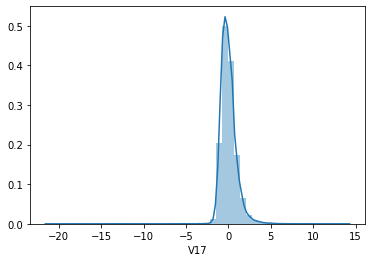

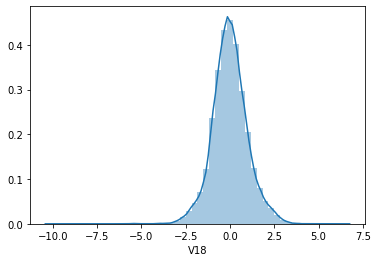

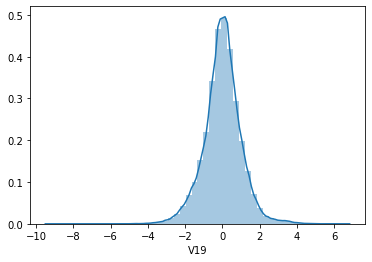

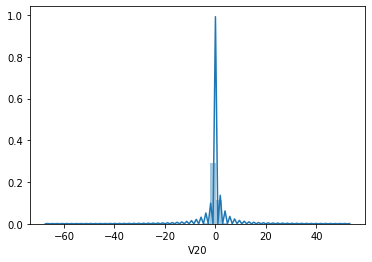

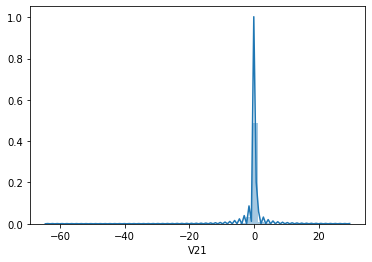

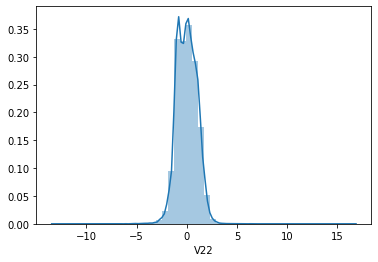

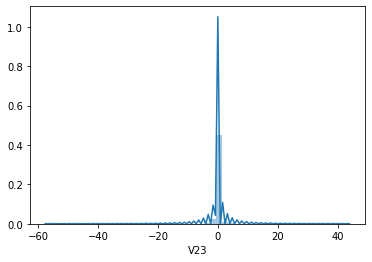

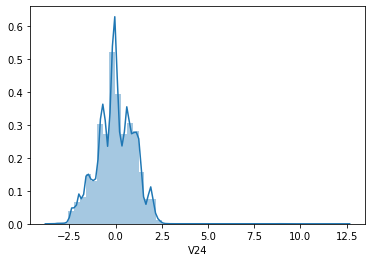

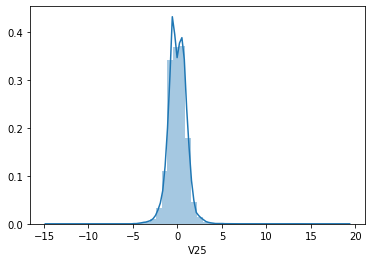

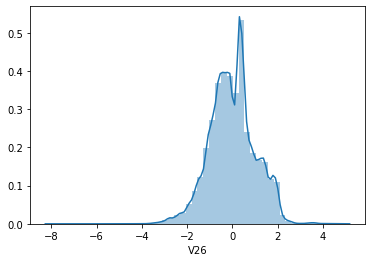

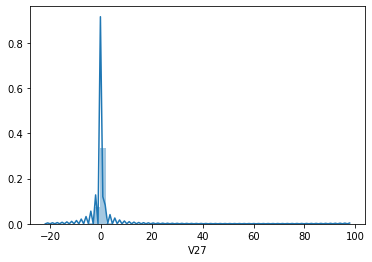

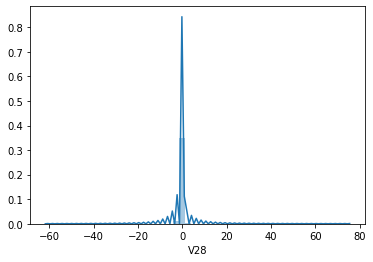

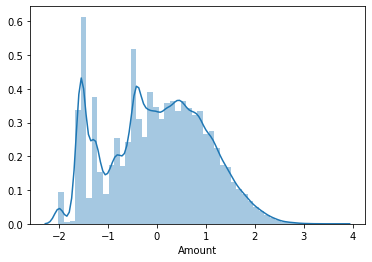

In [21]:
for i in X_train.columns:
    sns.distplot(X_train[i])
    plt.show()

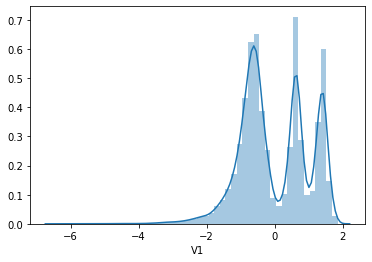

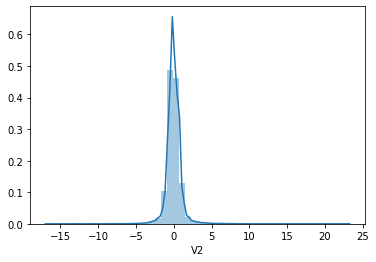

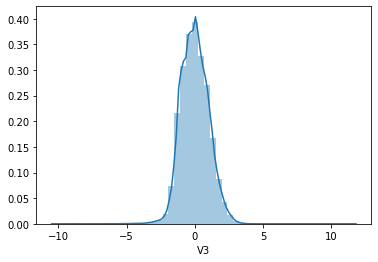

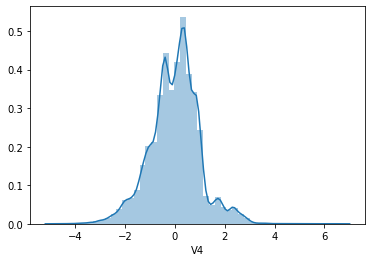

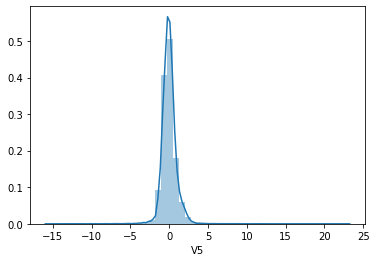

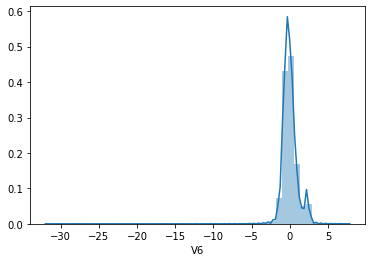

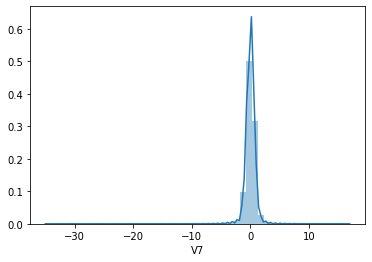

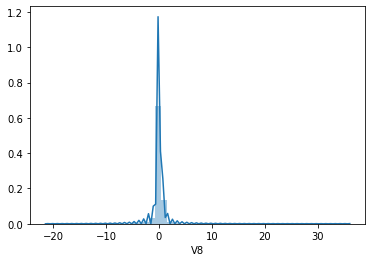

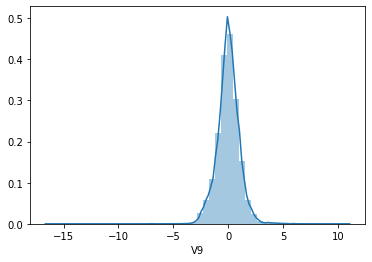

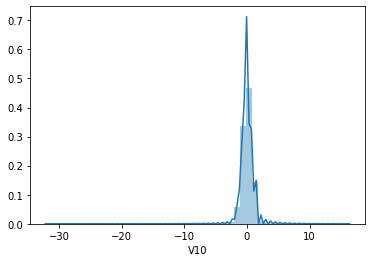

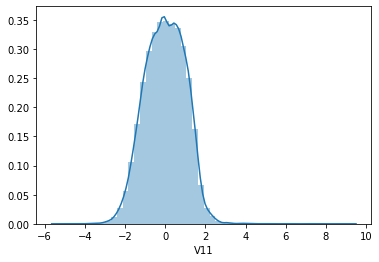

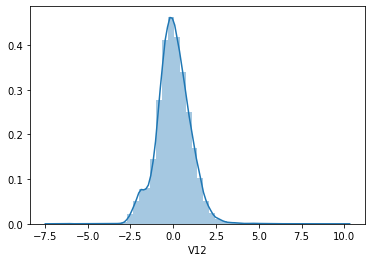

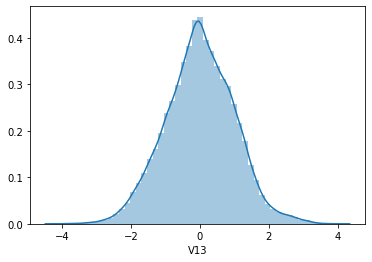

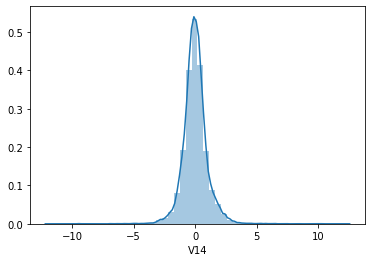

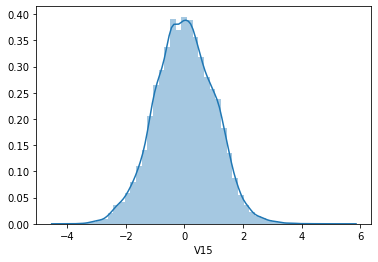

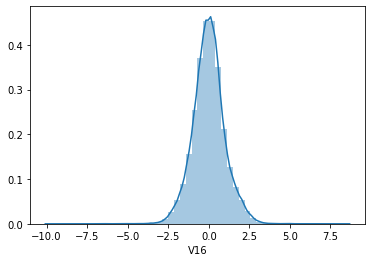

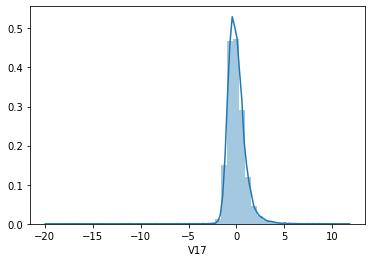

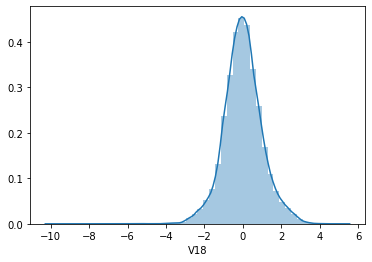

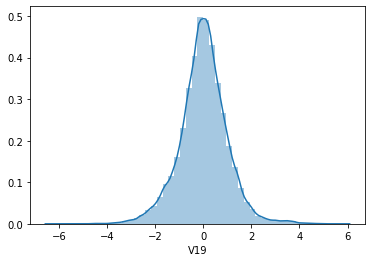

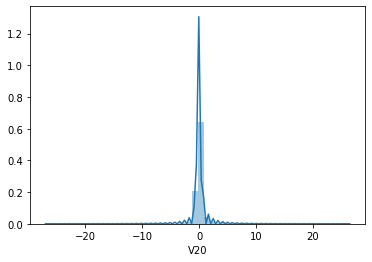

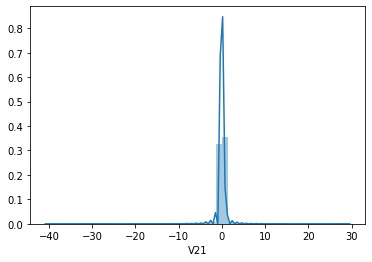

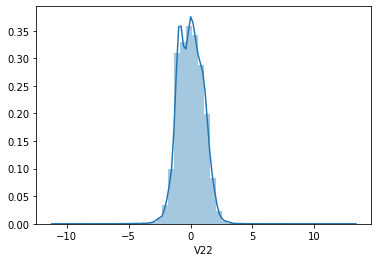

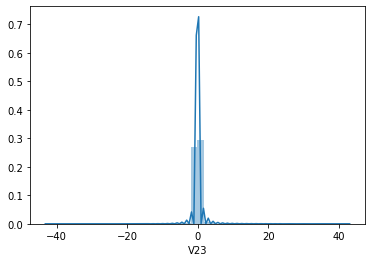

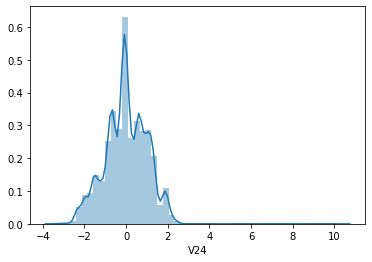

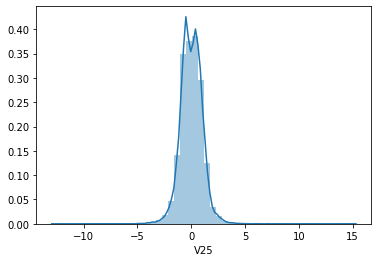

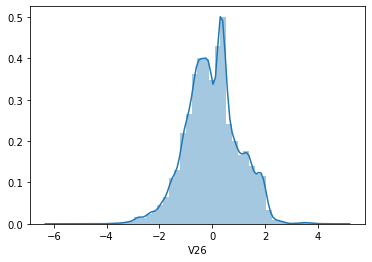

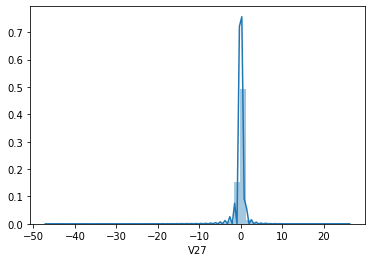

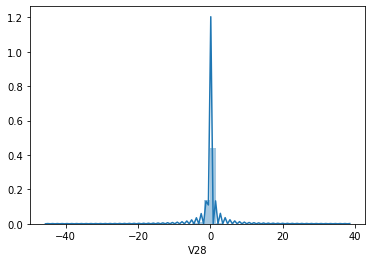

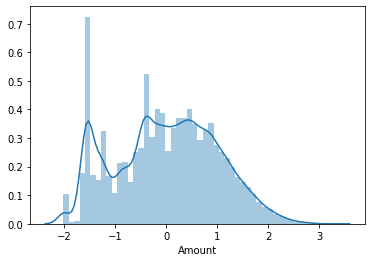

In [22]:
for i in X_test.columns:
    sns.distplot(X_test[i])
    plt.show()

## Model Building
- Let's first build the model on the imbalanced output and observe the results.
- Using Cross Validation for hyperparameter tuning.
- Let's take `Recall` as the metric in GridSearchCV as its important to capture the Positive Class (Fraudulent) in this case.

- The metric that will be considered is `Recall`. Recall basically tells us out of all the actual positive classes, how many of them the model is able to capture. Therefore, according to the requirement of the problem, it is very important to capture the positive classes (Fraudulent) for the business.

In [23]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

logreg = LogisticRegression()

params = {'C' : [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)

model_cv = GridSearchCV(estimator = logreg,
                        param_grid = params,
                        scoring = 'recall',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:  2.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0,
                               2.0, 3.0, 4.0, 5.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [24]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.553832,0.053161,0.009701,0.001100,0.001,{'C': 0.001},0.564103,0.475,0.425,0.625,0.375,0.435897,0.538462,0.564103,0.512821,0.410256,0.492564,0.076793,13,0.492958,0.491525,0.491525,0.471751,0.500000,0.498592,0.492958,0.495775,0.495775,0.487324,0.491818,0.007548
1,0.760094,0.025639,0.008860,0.003652,0.01,{'C': 0.01},0.641026,0.550,0.525,0.750,0.425,0.615385,0.666667,0.666667,0.615385,0.564103,0.601923,0.085760,12,0.608451,0.612994,0.607345,0.587571,0.641243,0.611268,0.614085,0.616901,0.619718,0.600000,0.611958,0.013114
2,0.923353,0.032517,0.009701,0.000900,0.05,{'C': 0.05},0.692308,0.575,0.550,0.750,0.450,0.641026,0.692308,0.666667,0.641026,0.564103,0.622244,0.083257,11,0.645070,0.644068,0.629944,0.612994,0.658192,0.636620,0.642254,0.645070,0.645070,0.630986,0.639027,0.011590
3,0.989757,0.052776,0.009000,0.000775,0.1,{'C': 0.1},0.692308,0.600,0.550,0.750,0.450,0.641026,0.692308,0.692308,0.666667,0.564103,0.629872,0.084590,6,0.645070,0.649718,0.632768,0.621469,0.669492,0.642254,0.645070,0.653521,0.647887,0.636620,0.644387,0.012167
4,1.015013,0.047290,0.009101,0.003270,0.2,{'C': 0.2},0.692308,0.600,0.550,0.750,0.450,0.641026,0.692308,0.692308,0.666667,0.564103,0.629872,0.084590,6,0.650704,0.649718,0.635593,0.624294,0.669492,0.647887,0.647887,0.659155,0.650704,0.636620,0.647205,0.012013


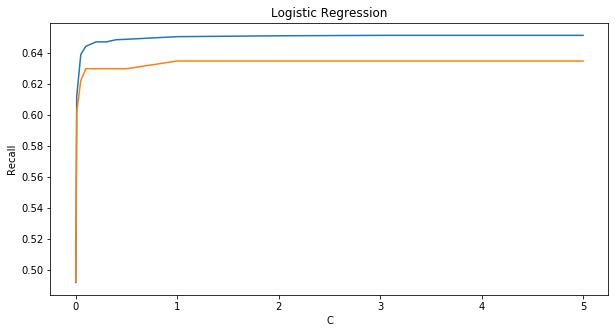

In [25]:
plt.figure(figsize = (10, 5))
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('Logistic Regression')
plt.show()

In [26]:
model_cv.best_params_

{'C': 1.0}

- `C` = 1 is adjusted as the best value.
- Building a Logistic Regression model based on `C` = 1 and also observing other metrics other than accuracy.

In [27]:
logreg = LogisticRegression(C = 1)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred_train_1 = logreg.predict(X_train)

*Let's now analyze the performance on the train data.*

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print(accuracy_score(y_train, pred_train_1))
print(precision_score(y_train, pred_train_1))
print(recall_score(y_train, pred_train_1))
print(f1_score(y_train, pred_train_1))

0.9992451008360947
0.8827586206896552
0.649746192893401
0.7485380116959064


- Accuracy is very high but that ws expected due to huge imbalance.
- Precision is also quite high but Recall is a little on the lower side.

In [30]:
confusion_matrix(y_train, pred_train_1)

array([[227417,     34],
       [   138,    256]], dtype=int64)

- Class `0` is captured quite well and Class `1` not enough.

*Let's also make predictions on test data.*

In [31]:
pred_test_1 = logreg.predict(X_test)

In [32]:
print(accuracy_score(y_test, pred_test_1))
print(precision_score(y_test, pred_test_1))
print(recall_score(y_test, pred_test_1))
print(f1_score(y_test, pred_test_1))

0.9991924440855307
0.8714285714285714
0.6224489795918368
0.7261904761904762


In [33]:
confusion_matrix(y_test, pred_test_1)

array([[56855,     9],
       [   37,    61]], dtype=int64)

- Almost similar results obtained on test set.

*Let's also look at the ROC Curve and AUC Score on both the train and test data for better understanding of the model.*

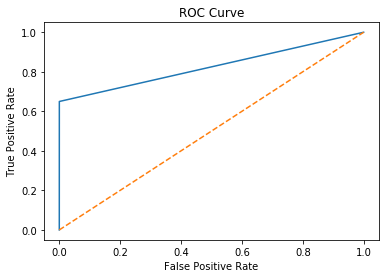

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresh = roc_curve(y_train, pred_train_1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [35]:
roc_auc_score(y_train, pred_train_1)

0.8247983550738334

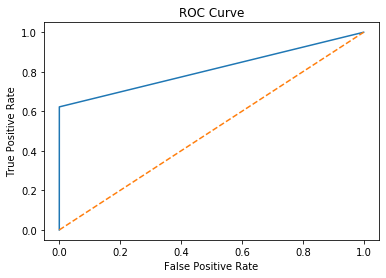

In [36]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [37]:
roc_auc_score(y_test, pred_test_1)

0.8111453536113375

- A random model would have an AUC Score of 0.5 but the model has more than 0.8 on both data.
- The model is decent as per the curve and the score.

*Let's also use other algorithms to make the predictions.*

In [42]:
# SVM

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

svc = SVC()
params = {'C' : [0.1, 0.2, 0.5, 0.7, 1, 1.5, 2, 3, 5]}
folds = StratifiedKFold(n_splits = 10, shuffle = True)

model_cv = RandomizedSearchCV(estimator = svc,
                        param_distributions = params,
                        scoring = 'recall',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 470.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 0.2, 0.5, 0.7, 1, 1.5, 2, 3,
                                              5]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='recall', verbose=1)

In [43]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [44]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,326.643636,268.174124,3.165360,0.506353,0.1,{'C': 0.1},0.307692,0.350,0.300,0.300,0.25,0.256410,0.230769,0.333333,0.282051,0.179487,0.278974,0.048258,9,0.301408,0.290960,0.290960,0.290960,0.305085,0.307042,0.312676,0.287324,0.304225,0.312676,0.300332,0.009063
1,705.586457,561.807648,3.699393,1.800842,0.2,{'C': 0.2},0.461538,0.475,0.450,0.550,0.45,0.358974,0.410256,0.461538,0.410256,0.282051,0.430962,0.068497,8,0.515493,0.483051,0.508475,0.491525,0.500000,0.512676,0.492958,0.501408,0.521127,0.521127,0.504784,0.012438
2,409.841352,403.907690,3.060104,0.046322,0.5,{'C': 0.5},0.538462,0.675,0.575,0.675,0.60,0.564103,0.641026,0.641026,0.615385,0.538462,0.606346,0.048926,7,0.718310,0.720339,0.723164,0.717514,0.728814,0.718310,0.707042,0.692958,0.715493,0.715493,0.715744,0.009265
3,192.724182,28.132306,2.997445,0.074203,0.7,{'C': 0.7},0.589744,0.650,0.700,0.675,0.60,0.564103,0.692308,0.641026,0.641026,0.589744,0.634295,0.044440,6,0.754930,0.757062,0.757062,0.754237,0.757062,0.749296,0.749296,0.735211,0.743662,0.752113,0.750993,0.006681
4,208.499070,24.980040,2.985265,0.105973,1,{'C': 1},0.589744,0.650,0.700,0.700,0.60,0.666667,0.717949,0.769231,0.692308,0.615385,0.670128,0.054017,5,0.819718,0.827684,0.824859,0.827684,0.824859,0.833803,0.819718,0.808451,0.828169,0.814085,0.822903,0.007119


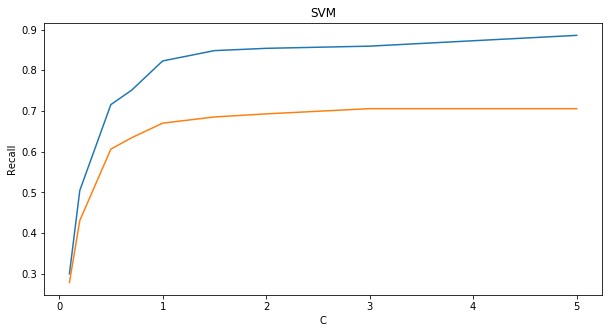

In [45]:
plt.figure(figsize = (10, 5))
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('SVM')
plt.show()

In [46]:
model_cv.best_params_

{'C': 3}

- `C` = 3 is the best parameter value.

In [47]:
svc = SVC(C = 3)
svc.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
pred_train_2 = svc.predict(X_train)

*Let's take a look at the metrics now.*

In [50]:
print(accuracy_score(y_train, pred_train_2))
print(precision_score(y_train, pred_train_2))
print(recall_score(y_train, pred_train_2))
print(f1_score(y_train, pred_train_2))

0.9997498299282407
0.9970501474926253
0.8578680203045685
0.9222373806275579


In [163]:
confusion_matrix(y_train, pred_train_2)

array([[227450,      1],
       [    56,    338]], dtype=int64)

- A significant jump can be observed in the performace of `SVM` as compared to `Logistic Regresion` as far as the Training set is concerned.

*Let's now make the predictions on Test data.*

In [51]:
pred_test_2 = svc.predict(X_test)

In [77]:
print(accuracy_score(y_test, pred_test_2))
print(precision_score(y_test, pred_test_2))
print(recall_score(y_test, pred_test_2))
print(f1_score(y_test, pred_test_2))

0.999420666409185
0.9452054794520548
0.7040816326530612
0.8070175438596492


In [164]:
confusion_matrix(y_test, pred_test_2)

array([[56860,     4],
       [   29,    69]], dtype=int64)

- The performance on the test set is lower compared to the performance achieved on the train set but still better than the performance of `Logistic Regression`.

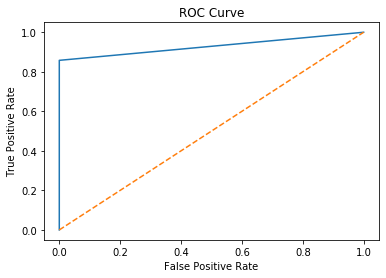

In [78]:
fpr, tpr, thresh = roc_curve(y_train, pred_train_2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [79]:
roc_auc_score(y_train, pred_train_2)

0.9289318118766117

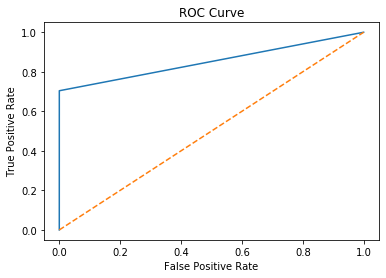

In [80]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [81]:
roc_auc_score(y_test, pred_test_2)

0.8520056446889392

- The curve also confirms that the performance of SVM is better than Logistic Regression.

In [42]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dtree = DecisionTreeClassifier()

params = {'max_depth' : [3, 5, 7, 9, 11],
          'max_features' : [1, 3, 5, 7, 9],
          'min_samples_leaf' : [1, 3, 5, 7, 9],
          'criterion' : ['gini', 'entropy']}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)

model_cv = RandomizedSearchCV(estimator = dtree,
                              param_distributions = params,
                              scoring = 'recall',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1,
                              random_state = 0)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
   

In [43]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.585409,0.072902,0.011261,0.001688,1,1,11,entropy,"{'min_samples_leaf': 1, 'max_features': 1, 'ma...",0.692308,0.675,0.775,0.650,0.675,0.717949,0.538462,0.717949,0.717949,0.589744,0.674936,0.065092,8,0.856338,0.841808,0.827684,0.652542,0.887006,0.861972,0.709859,0.839437,0.859155,0.729577,0.806538,0.075203
1,3.381914,0.280258,0.012340,0.004623,5,9,11,gini,"{'min_samples_leaf': 5, 'max_features': 9, 'ma...",0.743590,0.700,0.825,0.800,0.600,0.717949,0.769231,0.820513,0.692308,0.743590,0.741218,0.064910,2,0.800000,0.824859,0.793785,0.799435,0.790960,0.777465,0.794366,0.783099,0.828169,0.808451,0.800059,0.015584
2,2.099605,0.203037,0.012061,0.002234,5,7,9,gini,"{'min_samples_leaf': 5, 'max_features': 7, 'ma...",0.692308,0.625,0.675,0.800,0.600,0.641026,0.769231,0.743590,0.641026,0.743590,0.693077,0.064326,5,0.791549,0.785311,0.757062,0.771186,0.810734,0.766197,0.797183,0.777465,0.800000,0.805634,0.786232,0.016944
3,0.762213,0.015913,0.007500,0.003775,5,3,5,entropy,"{'min_samples_leaf': 5, 'max_features': 3, 'ma...",0.666667,0.525,0.725,0.825,0.650,0.743590,0.743590,0.538462,0.666667,0.666667,0.675064,0.087399,7,0.757746,0.610169,0.734463,0.765537,0.731638,0.732394,0.746479,0.538028,0.667606,0.678873,0.696293,0.069779
4,0.306153,0.011336,0.007500,0.003775,9,1,5,entropy,"{'min_samples_leaf': 9, 'max_features': 1, 'ma...",0.692308,0.750,0.425,0.725,0.500,0.512821,0.128205,0.461538,0.589744,0.307692,0.509231,0.184334,10,0.687324,0.731638,0.539548,0.562147,0.601695,0.552113,0.233803,0.400000,0.597183,0.354930,0.526038,0.145534


In [44]:
model_cv.best_params_

{'min_samples_leaf': 7,
 'max_features': 9,
 'max_depth': 7,
 'criterion': 'entropy'}

- These values for hyperparameters are adjusted as best values.

In [45]:
dtree = DecisionTreeClassifier(max_depth = 7,
                               max_features = 9,
                               min_samples_leaf = 7,
                               criterion = 'entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

*Let's now make predictions on both the train and test sets.*

In [46]:
pred_train_3 = dtree.predict(X_train)

*Let's have a look at the metrics as follows.*

In [47]:
print(accuracy_score(y_train, pred_train_3))
print(precision_score(y_train, pred_train_3))
print(recall_score(y_train, pred_train_3))
print(f1_score(y_train, pred_train_3))

0.9995128267023634
0.954983922829582
0.7538071065989848
0.8425531914893616


In [48]:
confusion_matrix(y_train, pred_train_3)

array([[227437,     14],
       [    97,    297]], dtype=int64)

- The metrics suggest a good performance on the train test.

*Let's now make the predictions on the test set.*

In [49]:
pred_test_3 = dtree.predict(X_test)

In [50]:
print(accuracy_score(y_test, pred_test_3))
print(precision_score(y_test, pred_test_3))
print(recall_score(y_test, pred_test_3))
print(f1_score(y_test, pred_test_3))

0.999385555282469
0.8888888888888888
0.7346938775510204
0.8044692737430168


In [51]:
confusion_matrix(y_test, pred_test_3)

array([[56855,     9],
       [   26,    72]], dtype=int64)

- The performance has dipped on the test set.

*Let's now look at the ROC metrics.*

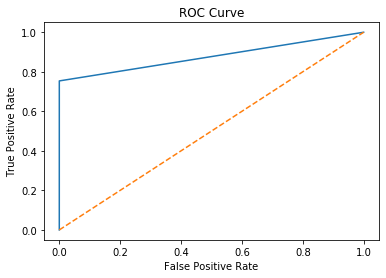

In [52]:
fpr, tpr, thresh = roc_curve(y_train, pred_train_3)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [53]:
roc_auc_score(y_train, pred_train_3)

0.8768727774400765

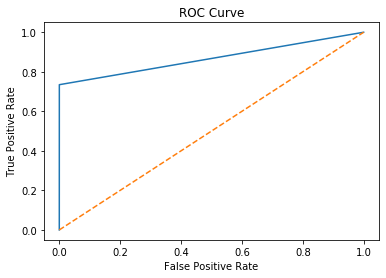

In [54]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_3)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [55]:
roc_auc_score(y_test, pred_test_3)

0.8672678025909294

- `Decision tress` have performed good.

In [57]:
# XgBoost

from xgboost import XGBClassifier

xgb = XGBClassifier()

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

params = {'n_estimators' : [10, 20, 30, 40],
          'max_depth' : [3, 6, 9, 12],
          'min_child_weight' : [1, 3, 5, 7]}

model_cv = RandomizedSearchCV(estimator = xgb,
                              param_distributions = params,
                              scoring = 'recall',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1,
                              random_state=0)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 24.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_ch...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           va

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,9.640830,0.358963,0.038602,0.002836,20,7,9,"{'n_estimators': 20, 'min_child_weight': 7, 'm...",0.692308,0.775,0.750,0.750,0.725,0.794872,0.846154,0.794872,0.820513,0.743590,0.769231,0.043779,7,0.825352,0.813559,0.819209,0.827684,0.827684,0.822535,0.816901,0.825352,0.822535,0.822535,0.822335,0.004380
1,9.216698,0.545623,0.038702,0.004859,20,7,6,"{'n_estimators': 20, 'min_child_weight': 7, 'm...",0.717949,0.775,0.750,0.750,0.725,0.794872,0.846154,0.794872,0.769231,0.769231,0.769231,0.035484,7,0.825352,0.813559,0.816384,0.822034,0.827684,0.825352,0.814085,0.825352,0.816901,0.830986,0.821769,0.005811
2,18.822671,0.482798,0.041202,0.000600,40,5,9,"{'n_estimators': 40, 'min_child_weight': 5, 'm...",0.692308,0.825,0.775,0.750,0.775,0.794872,0.897436,0.820513,0.743590,0.743590,0.781731,0.053796,4,0.864789,0.864407,0.872881,0.875706,0.867232,0.856338,0.861972,0.864789,0.845070,0.870423,0.864361,0.008300
3,9.645164,0.391586,0.037302,0.001553,20,7,12,"{'n_estimators': 20, 'min_child_weight': 7, 'm...",0.692308,0.775,0.750,0.750,0.725,0.794872,0.846154,0.794872,0.820513,0.743590,0.769231,0.043779,7,0.825352,0.813559,0.819209,0.827684,0.827684,0.822535,0.816901,0.825352,0.822535,0.822535,0.822335,0.004380
4,18.423887,0.518278,0.042942,0.003021,30,1,9,"{'n_estimators': 30, 'min_child_weight': 1, 'm...",0.743590,0.775,0.750,0.775,0.800,0.820513,0.871795,0.820513,0.769231,0.717949,0.784359,0.042616,3,0.935211,0.926554,0.946328,0.929379,0.932203,0.940845,0.926761,0.929577,0.926761,0.932394,0.932601,0.006227


In [59]:
model_cv.best_params_

{'n_estimators': 20, 'min_child_weight': 1, 'max_depth': 9}

In [60]:
xgb = XGBClassifier(n_estimators = 20,
                    min_child_weight = 1,
                    max_depth = 9)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

*Let's now make the predictions as follows.*

In [61]:
pred_train_4 = xgb.predict(X_train)

*Let's now compute the metrics as follows.*

In [62]:
print(accuracy_score(y_train, pred_train_4))
print(precision_score(y_train, pred_train_4))
print(recall_score(y_train, pred_train_4))
print(f1_score(y_train, pred_train_4))

0.9997849415172595
1.0
0.8756345177664975
0.9336941813261164


In [63]:
confusion_matrix(y_train, pred_train_4)

array([[227451,      0],
       [    49,    345]], dtype=int64)

- Good results on train data.

In [64]:
pred_test_4 = xgb.predict(X_test)

In [65]:
print(accuracy_score(y_test, pred_test_4))
print(precision_score(y_test, pred_test_4))
print(recall_score(y_test, pred_test_4))
print(f1_score(y_test, pred_test_4))

0.9996137776061234
0.9634146341463414
0.8061224489795918
0.8777777777777778


In [66]:
confusion_matrix(y_test, pred_test_4)

array([[56861,     3],
       [   19,    79]], dtype=int64)

- Decent results on test data as well.

*Let's also look at the ROC metrics*

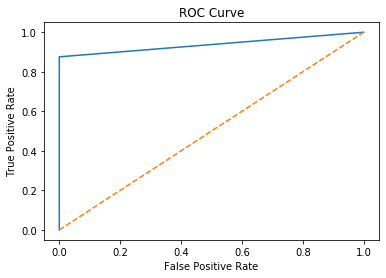

In [67]:
fpr, tpr, thresh = roc_curve(y_train, pred_train_4)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [68]:
roc_auc_score(y_train, pred_train_4)

0.9378172588832487

- The ROC curve suggests memorising on the train data !

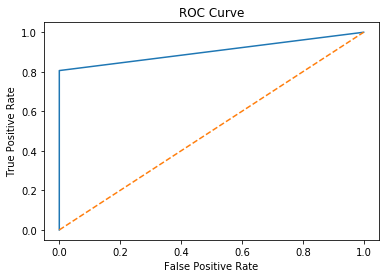

In [69]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_4)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [70]:
roc_auc_score(y_test, pred_test_4)

0.9030348457616024

- XGBoost is performing better than the previous models.

# Balancing the Classes

We will now be balancing the ouput variable using four techniques and measure the performance.
 
 - *Random Undersampling.*
 - *Random Oversampling.*
 - *SMOTE.*
 - *ADASYN.*

***Random Undersampling***

In [71]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=100)
X_rus, y_rus = sampler.fit_sample(X_train, y_train)

*Let's now have a look at the shape of the sampled data as follows.*

In [72]:
X_rus.shape

(788, 29)

- The size of the data has decreased considerably.

*Let's now plot the sampled output variable to check the balance.*

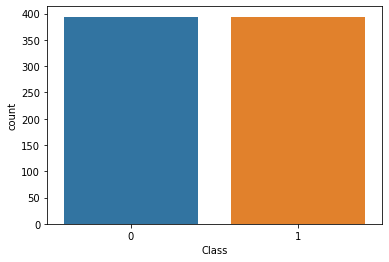

In [73]:
sns.countplot(y_rus)
plt.show()

- Perfectly balanced !

*Let's now build our data on this sampled subset as follows.*

In [77]:
# Logistic Regression

logreg_b_1 = LogisticRegression()

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)
params = {'C' : [0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.75, 1, 2, 4, 5]}

model_cv = GridSearchCV(estimator = logreg_b_1,
                        scoring = 'recall',
                        param_grid = params,
                        cv = folds,
                        return_train_score = True,
                        verbose = 1,
                        )

model_cv.fit(X_rus, y_rus)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    4.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.75, 1, 2, 4,
                               5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [78]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.0380,0.034583,0.0065,0.002291,0.05,{'C': 0.05},0.871795,0.897436,0.948718,0.846154,0.925,0.875,0.925,0.9,0.897436,0.923077,0.900962,0.029120,11,0.909859,0.909859,0.907042,0.918310,0.909605,0.906780,0.906780,0.906780,0.909859,0.907042,0.909192,0.003337
1,0.0275,0.004031,0.0060,0.002000,0.1,{'C': 0.1},0.871795,0.923077,0.974359,0.846154,0.925,0.875,0.950,0.9,0.923077,0.923077,0.911154,0.036507,3,0.912676,0.915493,0.907042,0.918310,0.915254,0.920904,0.909605,0.915254,0.909859,0.909859,0.913426,0.004148
2,0.0200,0.004472,0.0045,0.001500,0.15,{'C': 0.15},0.871795,0.923077,0.974359,0.846154,0.925,0.875,0.950,0.9,0.923077,0.923077,0.911154,0.036507,3,0.915493,0.915493,0.907042,0.918310,0.915254,0.920904,0.909605,0.915254,0.909859,0.909859,0.913707,0.004183
3,0.0210,0.003742,0.0045,0.001500,0.2,{'C': 0.2},0.871795,0.923077,0.974359,0.846154,0.925,0.875,0.950,0.9,0.923077,0.923077,0.911154,0.036507,3,0.918310,0.915493,0.907042,0.918310,0.915254,0.920904,0.909605,0.915254,0.909859,0.912676,0.914271,0.004196
4,0.0225,0.003354,0.0040,0.002000,0.3,{'C': 0.3},0.871795,0.923077,0.974359,0.846154,0.925,0.875,0.950,0.9,0.923077,0.923077,0.911154,0.036507,3,0.918310,0.921127,0.907042,0.921127,0.915254,0.920904,0.909605,0.915254,0.909859,0.912676,0.915116,0.004951


In [79]:
model_cv.best_params_

{'C': 4}

*Let's now fit the model on the sampled data.*

In [80]:
logreg_b_1 = LogisticRegression(C = 4)
logreg_b_1.fit(X_rus, y_rus)

LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*Let's now make the predictions as follows.*

In [81]:
pred_train_b_1 = logreg_b_1.predict(X_rus)

*Looking at the metrics as follows.*

In [82]:
print(accuracy_score(y_rus, pred_train_b_1))
print(precision_score(y_rus, pred_train_b_1))
print(recall_score(y_rus, pred_train_b_1))
print(f1_score(y_rus, pred_train_b_1))

0.950507614213198
0.981029810298103
0.9187817258883249
0.9488859764089121


In [83]:
confusion_matrix(y_rus, pred_train_b_1)

array([[387,   7],
       [ 32, 362]], dtype=int64)

- The metrics achieved on the sampled train data are quite good.

*Making the predictions on test data as follows.*

In [84]:
pred_test_b_1 = logreg_b_1.predict(X_test)

*Deteriming the metrics.*

In [85]:
print(accuracy_score(y_test, pred_test_b_1))
print(precision_score(y_test, pred_test_b_1))
print(recall_score(y_test, pred_test_b_1))
print(f1_score(y_test, pred_test_b_1))

0.9612548716688318
0.03972064600611087
0.9285714285714286
0.07618250313938886


In [86]:
confusion_matrix(y_test, pred_test_b_1)

array([[54664,  2200],
       [    7,    91]], dtype=int64)

- The precision has reduced drastically on the test set.

*Let's now take a look at ROC metrics*

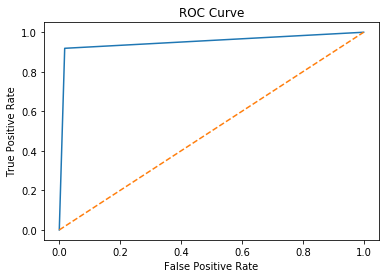

In [87]:
fpr, tpr, thresh = roc_curve(y_rus, pred_train_b_1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [88]:
roc_auc_score(y_rus, pred_train_b_1)

0.950507614213198

- Fitting on train is pretty good.

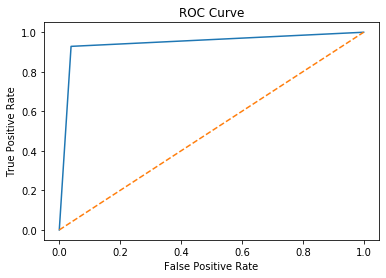

In [89]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_b_1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [96]:
roc_auc_score(y_test, pred_test_b_1)

0.944941313610419

- ROC metrics suggest quite good predictions on test data.

In [91]:
# Decision Tree

dtree_b_1 = DecisionTreeClassifier()

params = {'max_depth' : [3, 5, 7, 9, 11],
          'max_features' : [1, 3, 5, 7, 9],
          'min_samples_leaf' : [1, 3, 5, 7, 9],
          'criterion' : ['gini', 'entropy']}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)

model_cv = GridSearchCV(estimator = dtree_b_1,
                        param_grid = params,
                        scoring = 'recall',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1,
                        )

model_cv.fit(X_rus, y_rus)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   44.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
      

In [92]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.0055,1.500011e-03,0.0050,7.152557e-08,gini,3,1,1,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.615385,0.871795,0.769231,0.615385,0.800,0.80,0.375,0.750,0.641026,0.846154,0.708397,0.141734,248,0.692958,0.842254,0.743662,0.574648,0.793785,0.830508,0.426554,0.638418,0.616901,0.833803,0.699349,0.129268
1,0.0050,2.236066e-03,0.0035,3.201613e-03,gini,3,1,3,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.538462,0.871795,0.717949,0.717949,0.775,0.85,0.825,0.650,0.820513,0.871795,0.763846,0.102847,244,0.633803,0.828169,0.661972,0.704225,0.737288,0.796610,0.855932,0.723164,0.878873,0.800000,0.762004,0.078358
2,0.0050,1.168008e-07,0.0040,1.999986e-03,gini,3,1,5,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.743590,0.615385,0.615385,0.743590,0.850,0.80,0.700,0.850,0.333333,0.820513,0.707179,0.148853,249,0.774648,0.650704,0.650704,0.802817,0.782486,0.799435,0.745763,0.836158,0.594366,0.819718,0.745680,0.079343
3,0.0060,2.000046e-03,0.0035,2.291293e-03,gini,3,1,7,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.641026,0.820513,0.717949,0.794872,0.850,0.85,0.650,0.675,0.871795,0.666667,0.753782,0.087834,245,0.735211,0.853521,0.721127,0.805634,0.793785,0.810734,0.799435,0.618644,0.929577,0.661972,0.772964,0.086540
4,0.0040,1.999986e-03,0.0050,2.236066e-03,gini,3,1,9,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.230769,0.743590,0.743590,0.820513,0.450,0.80,0.850,0.750,0.538462,0.897436,0.682436,0.199497,250,0.222535,0.766197,0.808451,0.909859,0.550847,0.799435,0.889831,0.717514,0.664789,0.876056,0.720551,0.196124


In [93]:
model_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 7,
 'min_samples_leaf': 1}

*Making a model based on the values*

In [94]:
dtree_b_1 = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 11,
                                   max_features = 7,
                                   min_samples_leaf = 1)

dtree_b_1.fit(X_rus, y_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
pred_train_b_2 = dtree_b_1.predict(X_rus)

*Calculating the metrics as follows.*

In [98]:
print(accuracy_score(y_rus, pred_train_b_2))
print(precision_score(y_rus, pred_train_b_2))
print(recall_score(y_rus, pred_train_b_2))
print(f1_score(y_rus, pred_train_b_2))

0.998730964467005
1.0
0.9974619289340102
0.9987293519695045


- The model have achived great results on the sampled train data.

In [99]:
confusion_matrix(y_rus, pred_train_b_2)

array([[394,   0],
       [  1, 393]], dtype=int64)

*Let's now make predictions on the test data.*

In [100]:
pred_test_b_2 = dtree_b_1.predict(X_test)

In [101]:
print(accuracy_score(y_test, pred_test_b_2))
print(precision_score(y_test, pred_test_b_2))
print(recall_score(y_test, pred_test_b_2))
print(f1_score(y_test, pred_test_b_2))

0.9210701871423054
0.019239177962396152
0.8979591836734694
0.03767123287671233


- Again the same pattern, extremely low Precision.

In [102]:
confusion_matrix(y_test, pred_test_b_2)

array([[52378,  4486],
       [   10,    88]], dtype=int64)

*Taking a look at the ROC metrics..*

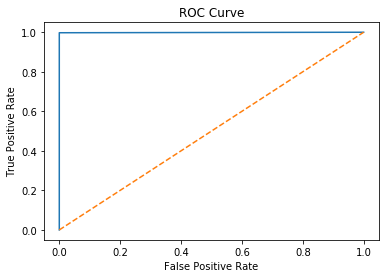

In [103]:
fpr, tpr, thresh = roc_curve(y_rus, pred_train_b_2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [104]:
roc_auc_score(y_rus, pred_train_b_2)

0.998730964467005

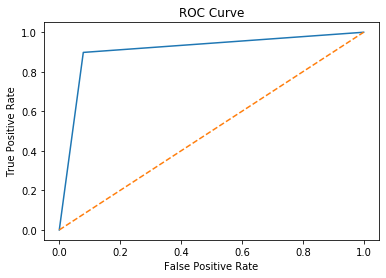

In [105]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_b_2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [106]:
roc_auc_score(y_test, pred_test_b_2)

0.9095346002779278

- The ROC metrics are high but too low precision achieved again.

In [107]:
# XGBoost

xgb_b_1 = XGBClassifier()

params = {'n_estimators' : [10, 20, 30, 40],
          'max_depth' : [3, 6, 9, 12],
          'min_child_weight' : [1, 3, 5, 7]}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

model_cv = GridSearchCV(estimator = xgb_b_1,
                        param_grid = params,
                        scoring = 'recall',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(X_rus, y_rus)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   28.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_we...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
 

In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.14934,0.273634,0.0055,2.692613e-03,3,1,10,"{'max_depth': 3, 'min_child_weight': 1, 'n_est...",0.897436,0.923077,0.974359,0.794872,0.950,0.875,0.925,0.9,0.923077,0.923077,0.908590,0.046041,50,0.940845,0.952113,0.954930,0.943662,0.946328,0.957627,0.949153,0.937853,0.957746,0.943662,0.948392,0.006686
1,0.04250,0.011236,0.0060,2.000105e-03,3,1,20,"{'max_depth': 3, 'min_child_weight': 1, 'n_est...",0.897436,0.923077,0.974359,0.794872,0.950,0.875,0.900,0.9,0.923077,0.923077,0.906090,0.045760,57,0.983099,0.985915,0.974648,0.991549,0.985876,0.988701,0.983051,0.983051,0.988732,0.983099,0.984772,0.004400
2,0.04750,0.002500,0.0060,1.999986e-03,3,1,30,"{'max_depth': 3, 'min_child_weight': 1, 'n_est...",0.948718,0.923077,0.948718,0.820513,0.950,0.875,0.925,0.9,0.923077,0.948718,0.916282,0.039500,9,0.997183,0.997183,1.000000,1.000000,0.997175,0.997175,0.997175,0.994350,1.000000,1.000000,0.998024,0.001808
3,0.05250,0.003354,0.0050,1.907349e-07,3,1,40,"{'max_depth': 3, 'min_child_weight': 1, 'n_est...",0.948718,0.923077,0.948718,0.794872,0.950,0.875,0.900,0.9,0.897436,0.948718,0.908654,0.045921,44,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.02050,0.001500,0.0055,1.500010e-03,3,3,10,"{'max_depth': 3, 'min_child_weight': 3, 'n_est...",0.871795,0.923077,0.974359,0.871795,0.925,0.900,0.925,0.9,0.923077,0.923077,0.913718,0.028436,24,0.940845,0.940845,0.943662,0.943662,0.943503,0.937853,0.935028,0.940678,0.943662,0.943662,0.941340,0.002814


In [109]:
model_cv.best_params_

{'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 40}

In [110]:
xgb_b_1 = XGBClassifier(max_depth = 3,
                        min_child_weight = 3,
                        n_estimators = 40)

xgb_b_1.fit(X_rus, y_rus)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

*Making the predictions and deterimining the metrics as follows..*

In [111]:
pred_train_b_3 = xgb_b_1.predict(X_rus)

In [112]:
print(accuracy_score(y_rus, pred_train_b_3))
print(precision_score(y_rus, pred_train_b_3))
print(recall_score(y_rus, pred_train_b_3))
print(f1_score(y_rus, pred_train_b_3))

0.9961928934010152
0.9974554707379135
0.9949238578680203
0.9961880559085134


- Very high metrics achieved.

In [113]:
confusion_matrix(y_rus, pred_train_b_3)

array([[393,   1],
       [  2, 392]], dtype=int64)

In [114]:
pred_test_b_3 = xgb_b_1.predict(X_test)

In [115]:
print(accuracy_score(y_test, pred_test_b_3))
print(precision_score(y_test, pred_test_b_3))
print(recall_score(y_test, pred_test_b_3))
print(f1_score(y_test, pred_test_b_3))

0.9511604227379656
0.03207810320781032
0.9387755102040817
0.06203641267700607


- Again the same pattern, very low Precision.

In [116]:
confusion_matrix(y_test, pred_test_b_3)

array([[54088,  2776],
       [    6,    92]], dtype=int64)

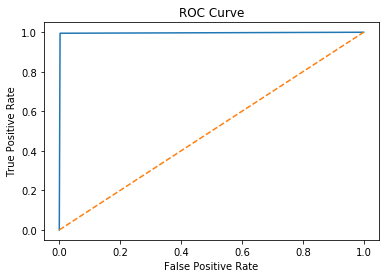

In [117]:
fpr, tpr, thresh = roc_curve(y_rus, pred_train_b_3)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [118]:
roc_auc_score(y_rus, pred_train_b_3)

0.9961928934010151

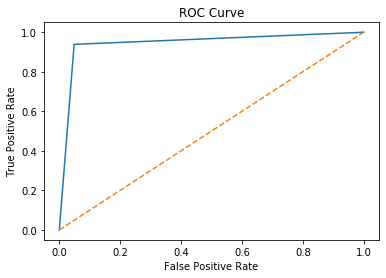

In [119]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_b_3)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [120]:
roc_auc_score(y_test, pred_test_b_3)

0.9449786386135772

- Same patterns. High ROC metrics observed but Precision score too low.

***Random Over Sampling***

*Let's now perform Random Over Sampling and observe the class distribution.*

In [121]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=100)
X_ros, y_ros = ros.fit_sample(X_train, y_train)

In [122]:
X_ros.shape

(454902, 29)

*Let's use a countplot to see the distribution of output variable.*

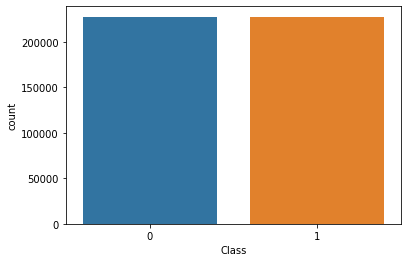

In [123]:
sns.countplot(y_ros)
plt.show()

- As we can observe, Class balance has been achieved.

*Let's now move towards the Model Building part by first performing Cross validation.*

In [124]:
# Logistic Regression

logreg_b_2 = LogisticRegression()

params = {'C' : [0.25, 0.5, 1, 1.5]}
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

model_cv = GridSearchCV(estimator = logreg_b_2,
                        param_grid = params,
                        cv = folds,
                        return_train_score = True,
                        scoring = 'recall',
                        verbose = 1)

model_cv.fit(X_ros, y_ros)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.25, 0.5, 1, 1.5]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='recall', verbose=1)

In [125]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,2.369824,0.422291,0.02112,0.005255,0.25,{'C': 0.25},0.917388,0.916557,0.915014,0.920334,0.918619,0.915674,0.918488,0.918532,0.918268,0.919015,0.917789,0.001542,1,0.917003,0.917095,0.917267,0.916676,0.919651,0.917193,0.916881,0.916876,0.91969,0.919607,0.917794,0.001225
1,2.330464,0.405186,0.02472,0.006657,0.5,{'C': 0.5},0.917388,0.916557,0.915014,0.920334,0.918619,0.915674,0.918488,0.918532,0.918268,0.919015,0.917789,0.001542,1,0.917003,0.917095,0.917267,0.916676,0.919651,0.917193,0.916881,0.916876,0.91969,0.919607,0.917794,0.001225
2,2.130724,0.101226,0.01716,0.004680,1,{'C': 1},0.917388,0.916557,0.915014,0.920334,0.918619,0.915674,0.918488,0.918532,0.918268,0.919015,0.917789,0.001542,1,0.917003,0.917095,0.917267,0.916676,0.919651,0.917193,0.916881,0.916876,0.91969,0.919607,0.917794,0.001225
3,2.188204,0.151190,0.01872,0.006240,1.5,{'C': 1.5},0.917388,0.916557,0.915014,0.920334,0.918619,0.915674,0.918488,0.918532,0.918268,0.919015,0.917789,0.001542,1,0.917003,0.917095,0.917267,0.916676,0.919651,0.917193,0.916881,0.916876,0.91969,0.919607,0.917794,0.001225


In [126]:
model_cv.best_params_

{'C': 0.25}

In [127]:
logreg_b_2 = LogisticRegression(C = 0.25)
logreg_b_2.fit(X_ros, y_ros)

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*Making the predictions...*

In [128]:
pred_train_os_1 = logreg_b_2.predict(X_ros)

*Calculating the metrics...*

In [129]:
print(accuracy_score(y_ros, pred_train_os_1))
print(precision_score(y_ros, pred_train_os_1))
print(recall_score(y_ros, pred_train_os_1))
print(f1_score(y_ros, pred_train_os_1))

0.9453003064396287
0.9719752465097206
0.9170414726688385
0.9437096055396823


In [130]:
confusion_matrix(y_ros, pred_train_os_1)

array([[221437,   6014],
       [ 18869, 208582]], dtype=int64)

- High metrics achieved on oversampled train set.

*Let's make the predictions on test set.*

In [131]:
pred_test_os_1 = logreg_b_2.predict(X_test)

*Calculating the metrics*

In [132]:
print(accuracy_score(y_test, pred_test_os_1))
print(precision_score(y_test, pred_test_os_1))
print(recall_score(y_test, pred_test_os_1))
print(f1_score(y_test, pred_test_os_1))

0.9728766546118465
0.05531653349723417
0.9183673469387755
0.10434782608695652


In [133]:
confusion_matrix(y_test, pred_test_os_1)

array([[55327,  1537],
       [    8,    90]], dtype=int64)

- Similar trend of low precision observed as in the case of undersampling.

*Let's look at the ROC metrics.*

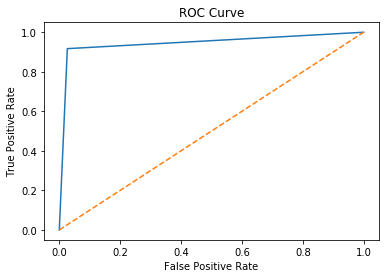

In [134]:
fpr, tpr, thresh = roc_curve(y_ros, pred_train_os_1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [135]:
roc_auc_score(y_ros, pred_train_os_1)

0.9453003064396287

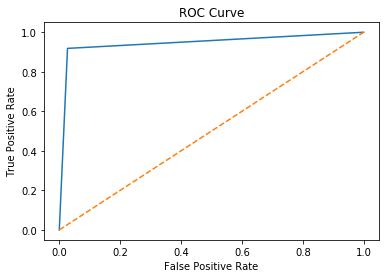

In [136]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_os_1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [137]:
roc_auc_score(y_test, pred_test_os_1)

0.9456689717248745

In [138]:
# Decision Tree

dtree_b_2 = DecisionTreeClassifier()

params = {'max_depth' : [3, 5, 7, 9, 11],
          'max_features' : [1, 3, 5, 7, 9],
          'min_samples_leaf' : [1, 3, 5, 7, 9],
          'criterion' : ['gini', 'entropy']}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

model_cv = RandomizedSearchCV(estimator = dtree_b_2,
                              param_distributions = params,
                              cv = folds,
                              return_train_score = True,
                              scoring = 'recall',
                              verbose = 1,
                              random_state=0)

model_cv.fit(X_ros, y_ros)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
     

In [139]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.738643,0.218485,0.05360,0.010699,1,1,11,entropy,"{'min_samples_leaf': 1, 'max_features': 1, 'ma...",0.918619,0.954366,0.908507,0.934139,0.989800,0.961926,0.978105,0.988261,0.978809,0.971554,0.958409,0.027467,5,0.918542,0.954896,0.911214,0.933891,0.990103,0.964784,0.977241,0.990113,0.979810,0.972805,0.959340,0.027371
1,7.308412,1.659357,0.04482,0.011439,5,9,11,gini,"{'min_samples_leaf': 5, 'max_features': 9, 'ma...",0.986239,0.996966,1.000000,0.992350,0.997318,1.000000,0.984480,0.983865,0.976434,0.997098,0.991475,0.007762,1,0.984939,0.997470,1.000000,0.992213,0.997523,1.000000,0.985179,0.984895,0.977861,0.997557,0.991764,0.007520
2,5.904750,0.211993,0.05230,0.007034,5,7,9,gini,"{'min_samples_leaf': 5, 'max_features': 7, 'ma...",0.989756,0.966675,0.990064,0.992526,0.965751,0.994900,0.970455,0.965135,0.986898,0.984040,0.980620,0.011524,2,0.990098,0.967299,0.989673,0.992604,0.967373,0.994924,0.969395,0.964710,0.987411,0.984886,0.980837,0.011471
3,2.581944,0.124914,0.05336,0.010198,5,3,5,entropy,"{'min_samples_leaf': 5, 'max_features': 3, 'ma...",0.916773,0.897433,0.906661,0.853067,0.906573,0.890437,0.902836,0.911805,0.862871,0.874390,0.892284,0.020631,8,0.916475,0.899358,0.906129,0.853400,0.906852,0.891996,0.900745,0.911918,0.866081,0.873306,0.892626,0.020134
4,1.181122,0.062383,0.05616,0.007642,9,1,5,entropy,"{'min_samples_leaf': 9, 'max_features': 1, 'ma...",0.871664,0.894839,0.858255,0.891009,0.891053,0.850473,0.901825,0.836931,0.794460,0.790503,0.858101,0.038393,10,0.870746,0.896471,0.861006,0.887800,0.891039,0.853605,0.898713,0.834700,0.792649,0.792327,0.857905,0.037993


*Looking at the best parameter values and buildong a decision tree model based on that as follows..*

In [140]:
model_cv.best_params_

{'min_samples_leaf': 5,
 'max_features': 9,
 'max_depth': 11,
 'criterion': 'gini'}

In [141]:
dtree_b_2 = DecisionTreeClassifier(min_samples_leaf = 5,
                                   max_features = 9,
                                   max_depth = 11,
                                   criterion = 'gini')

dtree_b_2.fit(X_ros, y_ros)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

*Making the predictions..*

In [142]:
pred_train_os_2 = dtree_b_2.predict(X_ros)

*Calculating the metrics*

In [143]:
print(accuracy_score(y_ros, pred_train_os_2))
print(precision_score(y_ros, pred_train_os_2))
print(recall_score(y_ros, pred_train_os_2))
print(f1_score(y_ros, pred_train_os_2))

0.9949967245692479
0.9949619065622706
0.9950318969800089
0.9949969005403172


In [144]:
confusion_matrix(y_ros, pred_train_os_2)

array([[226305,   1146],
       [  1130, 226321]], dtype=int64)

- Near perfect results achieved on oversampled train data.

*Making the predictions on test data and calculating the metrics..*

In [145]:
pred_test_os_2 = dtree_b_2.predict(X_test)

In [146]:
print(accuracy_score(y_test, pred_test_os_2))
print(precision_score(y_test, pred_test_os_2))
print(recall_score(y_test, pred_test_os_2))
print(f1_score(y_test, pred_test_os_2))

0.9946104420490853
0.21525885558583105
0.8061224489795918
0.33978494623655914


In [147]:
confusion_matrix(y_test, pred_test_os_2)

array([[56576,   288],
       [   19,    79]], dtype=int64)

- Recall has dropped significantly indicating that overfitting has taken place.

*Observing the ROC Metrics..*

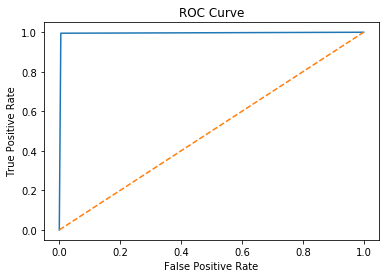

In [148]:
fpr, tpr, thresh = roc_curve(y_ros, pred_train_os_2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [149]:
roc_auc_score(y_ros, pred_train_os_2)

0.9949967245692479

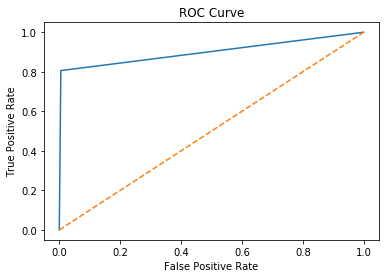

In [150]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_os_2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [151]:
roc_auc_score(y_test, pred_test_os_2)

0.9005288665832119

- ROC metrics also suggest that model has performed well on test data and too well on train data i.e. model has overfitted.

In [152]:
# XGBoost

xgb_b_2 = XGBClassifier()

params = {'n_estimators' : [10, 20, 30, 40, 50],
          'max_depth' : [3, 6, 9, 12, 15],
          'min_child_weight' : [1, 3, 5, 7, 9]}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

model_cv = RandomizedSearchCV(estimator = xgb_b_2,
                             scoring = 'recall',
                             param_distributions = params,
                             return_train_score = True,
                             verbose = 1,
                             cv = folds,
                             random_state=0)

model_cv.fit(X_ros, y_ros)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 128.1min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_ch...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           va

In [153]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,22.290878,0.815495,0.096160,0.006727,40,3,3,"{'n_estimators': 40, 'min_child_weight': 3, 'm...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,16.048227,0.763042,0.079300,0.002100,10,1,9,"{'n_estimators': 10, 'min_child_weight': 1, 'm...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,38.655205,0.591638,0.102900,0.007955,40,7,6,"{'n_estimators': 40, 'min_child_weight': 7, 'm...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,33.655705,32.701200,0.087801,0.007445,50,9,3,"{'n_estimators': 50, 'min_child_weight': 9, 'm...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,44.039040,0.312480,0.094103,0.001781,40,5,9,"{'n_estimators': 40, 'min_child_weight': 5, 'm...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [154]:
model_cv.best_params_

{'n_estimators': 40, 'min_child_weight': 3, 'max_depth': 3}

*Making the model with these parameter values..*

In [155]:
xgb_b_2 = XGBClassifier(n_estimators = 40, min_child_weight = 3, max_depth = 3)
xgb_b_2.fit(X_ros, y_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

*Making the predictions..*

In [156]:
pred_train_os_3 = xgb_b_2.predict(X_ros)

*Calculating the metrics..*

In [157]:
print(accuracy_score(y_ros, pred_train_os_3))
print(precision_score(y_ros, pred_train_os_3))
print(recall_score(y_ros, pred_train_os_3))
print(f1_score(y_ros, pred_train_os_3))

0.9976852157167917
0.9953917655708434
1.0
0.9976905615685759


In [158]:
confusion_matrix(y_ros, pred_train_os_3)

array([[226398,   1053],
       [     0, 227451]], dtype=int64)

- Near perfect results on oversampled train data with Recall being 1.

*Making the predictions on test data..*

In [159]:
pred_test_os_3 = xgb_b_2.predict(X_test)

In [160]:
print(accuracy_score(y_test, pred_test_os_3))
print(precision_score(y_test, pred_test_os_3))
print(recall_score(y_test, pred_test_os_3))
print(f1_score(y_test, pred_test_os_3))

0.9949264421895299
0.23978201634877383
0.8979591836734694
0.3784946236559139


In [161]:
confusion_matrix(y_test, pred_test_os_3)

array([[56585,   279],
       [   10,    88]], dtype=int64)

- There is a jump in precision as compared to other models with both undersampled and oversampled train data with also quite high Recall.

*Observing the ROC metrics..*

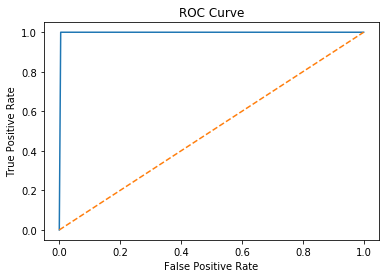

In [162]:
fpr, tpr, thresh = roc_curve(y_ros, pred_train_os_3)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [163]:
roc_auc_score(y_ros, pred_train_os_3)

0.9976852157167918

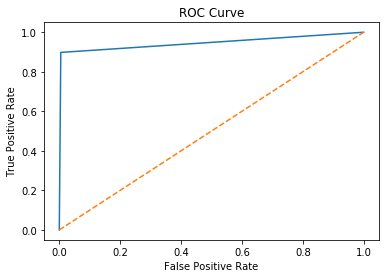

In [164]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_os_3)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [165]:
roc_auc_score(y_test, pred_test_os_3)

0.9465263701147314

- XGBoost has performed quite well as compared to other models in terms of all the metrics.

- One thing to observe is that the value of Precision both in the case of Random Undersampling and Oversampling is has been very low when evaluating the model performance on test data. That is becasue Precision is dependent on False Positive in its denominator and the number of negative classes (0) are much greater than the number of positive classes (1) in the test set. Therefore, the number of 0s incorrectly identified has 1s (False Positive) is also a big number resulting in very low Precision. However, Recall, which basically means the correct identification of positive classes out of all the actual positive classes, is quite high. The models are able to capture the correct positive classes. So we can say that the models are behaving quite well in that task which is basically the requirement of the problem statement.

***SMOTE***

*Let's now use the SMOTE technique which stands for Synthetic Minority Oversampling Technique for balancing the classes.*

In [166]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_smote, y_smote = smote.fit_sample(X_train, y_train)

*Checking the input shape and the class balance of the output as follows..*

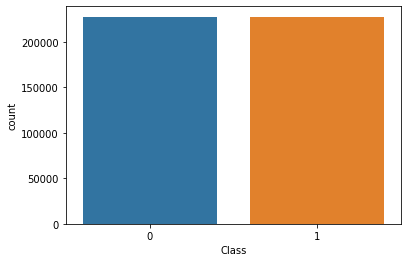

In [167]:
sns.countplot(y_smote)
plt.show()

In [168]:
y_smote.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

- Perfectly balanced !

*Let's now proceed towards Model building.*

In [169]:
# Logistic Regression

logreg_b_3 = LogisticRegression()

params = {'C' : [0.1, 0.2, 0.4, 0.6, 1, 2]}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

model_cv = GridSearchCV(estimator = logreg_b_3,
                        param_grid = params,
                        cv = folds,
                        scoring = 'recall',
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(X_smote, y_smote)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.4, 0.6, 1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [170]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,2.033127,0.048039,0.01716,4.679966e-03,0.1,{'C': 0.1},0.918619,0.91726,0.917125,0.917520,0.919103,0.917740,0.918048,0.919235,0.916069,0.918663,0.917938,0.000942,6,0.918092,0.917892,0.917858,0.917638,0.917941,0.917926,0.917916,0.917931,0.918317,0.917794,0.917931,0.000169
1,2.022964,0.057547,0.01560,2.132481e-07,0.2,{'C': 0.2},0.918619,0.91726,0.917213,0.917608,0.919191,0.917784,0.918180,0.919323,0.916245,0.918663,0.918009,0.000920,5,0.918166,0.917975,0.917951,0.917711,0.918009,0.918004,0.917975,0.917970,0.918381,0.917858,0.918000,0.000167
2,2.055124,0.067194,0.01560,1.507891e-07,0.4,{'C': 0.4},0.918619,0.91726,0.917257,0.917608,0.919235,0.917784,0.918224,0.919323,0.916245,0.918707,0.918026,0.000926,4,0.918200,0.917999,0.917990,0.917760,0.918068,0.918039,0.918009,0.918004,0.918415,0.917897,0.918038,0.000165
3,2.031724,0.080300,0.01872,6.240022e-03,0.6,{'C': 0.6},0.918663,0.91726,0.917257,0.917608,0.919279,0.917828,0.918224,0.919323,0.916289,0.918751,0.918048,0.000929,3,0.918219,0.918019,0.918009,0.917780,0.918087,0.918039,0.918014,0.918014,0.918429,0.917907,0.918052,0.000165
4,2.060706,0.083956,0.01560,1.668930e-07,1,{'C': 1},0.918663,0.91726,0.917257,0.917608,0.919279,0.917828,0.918224,0.919323,0.916333,0.918795,0.918057,0.000924,1,0.918219,0.918033,0.918019,0.917789,0.918097,0.918043,0.918034,0.918034,0.918434,0.917912,0.918061,0.000163


*Looking at the best parameter value...*

In [171]:
model_cv.best_params_

{'C': 1}

In [172]:
logreg_b_3 = LogisticRegression(C = 1)
logreg_b_3.fit(X_smote, y_smote)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*Making the predictions on both the train and test set and calculating the metrics as follows...*

In [173]:
pred_train_smote_1 = logreg_b_3.predict(X_smote)

In [174]:
print(accuracy_score(y_smote, pred_train_smote_1))
print(precision_score(y_smote, pred_train_smote_1))
print(recall_score(y_smote, pred_train_smote_1))
print(f1_score(y_smote, pred_train_smote_1))

0.9448254788943553
0.9699827198572994
0.9180614725809075
0.9433081786292682


In [175]:
confusion_matrix(y_smote, pred_train_smote_1)

array([[220989,   6462],
       [ 18637, 208814]], dtype=int64)

- Quite high performance on the smote data.

In [176]:
pred_test_smote_1 = logreg_b_3.predict(X_test)

In [177]:
print(accuracy_score(y_test, pred_test_smote_1))
print(precision_score(y_test, pred_test_smote_1))
print(recall_score(y_test, pred_test_smote_1))
print(f1_score(y_test, pred_test_smote_1))

0.9701379867279941
0.050980392156862744
0.9285714285714286
0.0966542750929368


In [178]:
confusion_matrix(y_test, pred_test_smote_1)

array([[55170,  1694],
       [    7,    91]], dtype=int64)

*Let's take a lot at the ROC metrics*

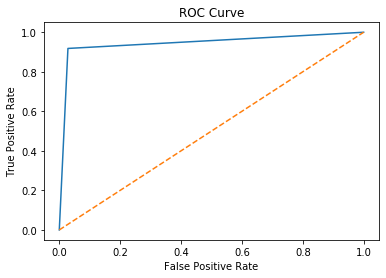

In [179]:
fpr, tpr, thresh = roc_curve(y_smote, pred_train_smote_1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [180]:
roc_auc_score(y_smote, pred_train_smote_1)

0.9448254788943552

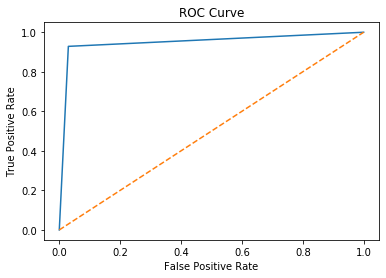

In [181]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_smote_1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

- ROC suggests good model performance.

In [182]:
# Decision Tree

dtree_b_3 = DecisionTreeClassifier()

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

params = {'max_depth' : [3, 5, 7, 9, 11],
          'max_features' : [1, 3, 5, 7, 9],
          'min_samples_leaf' : [1, 3, 5, 7, 9],
          'criterion' : ['gini', 'entropy']}

model_cv = RandomizedSearchCV(estimator = dtree_b_3,
                              cv = folds,
                              scoring = 'recall',
                              param_distributions = params,
                              return_train_score = True,
                              verbose = 1,
                              random_state = 0)

model_cv.fit(X_smote, y_smote)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
     

In [183]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.125296,0.056774,0.01990,0.006099,1,1,11,entropy,"{'min_samples_leaf': 1, 'max_features': 1, 'ma...",0.947065,0.918183,0.932996,0.932381,0.947285,0.885206,0.952033,0.941482,0.941130,0.929435,0.932720,0.018489,6,0.947466,0.919621,0.933905,0.933045,0.948023,0.887463,0.951975,0.941394,0.943866,0.929899,0.933666,0.018006
1,5.297931,0.136603,0.02028,0.007149,5,9,11,gini,"{'min_samples_leaf': 5, 'max_features': 9, 'ma...",0.986942,0.987954,0.972829,0.985447,0.968696,0.979204,0.983996,0.983381,0.977797,0.984876,0.981112,0.006038,1,0.988647,0.989067,0.974397,0.986249,0.970353,0.979830,0.984207,0.982687,0.979312,0.986161,0.982091,0.005832
2,3.544106,0.028687,0.02038,0.007306,5,7,9,gini,"{'min_samples_leaf': 5, 'max_features': 7, 'ma...",0.965487,0.945353,0.977797,0.974456,0.979600,0.968301,0.956430,0.965355,0.979820,0.963860,0.967646,0.010431,2,0.967632,0.946670,0.979537,0.974461,0.979639,0.968364,0.955800,0.963474,0.981451,0.965209,0.968224,0.010598
3,1.543143,0.037143,0.01872,0.006240,5,3,5,entropy,"{'min_samples_leaf': 5, 'max_features': 3, 'ma...",0.903803,0.849424,0.829369,0.854386,0.854605,0.896153,0.904550,0.891581,0.895933,0.917696,0.879750,0.028351,8,0.900863,0.850981,0.830230,0.852906,0.854269,0.896652,0.903877,0.889866,0.898093,0.917726,0.879546,0.028007
4,0.652381,0.019458,0.01882,0.006197,9,1,5,entropy,"{'min_samples_leaf': 9, 'max_features': 1, 'ma...",0.838690,0.780797,0.856496,0.827039,0.849505,0.851704,0.818026,0.802726,0.845241,0.860453,0.833068,0.024519,10,0.838016,0.780201,0.858226,0.827553,0.849829,0.851675,0.816151,0.801887,0.847445,0.861719,0.833270,0.025289


In [184]:
model_cv.best_params_

{'min_samples_leaf': 5,
 'max_features': 9,
 'max_depth': 11,
 'criterion': 'gini'}

*Let's make the Decision Tree model based on these parameter values.*

In [185]:
dtree_b_3 = DecisionTreeClassifier(min_samples_leaf = 5,
                                   max_features = 9,
                                   max_depth = 11,
                                   criterion = 'gini')

dtree_b_3.fit(X_smote, y_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

*Making the predictions and determining metrics..*

In [186]:
pred_train_smote_2 = dtree_b_3.predict(X_smote)

In [187]:
print(accuracy_score(y_smote, pred_train_smote_2))
print(precision_score(y_smote, pred_train_smote_2))
print(recall_score(y_smote, pred_train_smote_2))
print(f1_score(y_smote, pred_train_smote_2))

0.9899758629331152
0.9876432468856519
0.9923675868648631
0.9899997806969452


In [188]:
confusion_matrix(y_smote, pred_train_smote_2)

array([[224627,   2824],
       [  1736, 225715]], dtype=int64)

- Good performace on train data.

In [189]:
pred_test_smote_2 = dtree_b_3.predict(X_test)

In [190]:
print(accuracy_score(y_test, pred_test_smote_2))
print(precision_score(y_test, pred_test_smote_2))
print(recall_score(y_test, pred_test_smote_2))
print(f1_score(y_test, pred_test_smote_2))

0.9858677714967873
0.096
0.8571428571428571
0.17266187050359713


In [191]:
confusion_matrix(y_test, pred_test_smote_2)

array([[56073,   791],
       [   14,    84]], dtype=int64)

- Performace on test also with respect to Recall has surely dipped.

*Looking at ROC..*

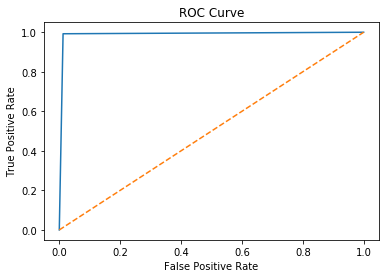

In [192]:
fpr, tpr, thresh = roc_curve(y_smote, pred_train_smote_2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [193]:
roc_auc_score(y_smote, pred_train_smote_2)

0.9899758629331152

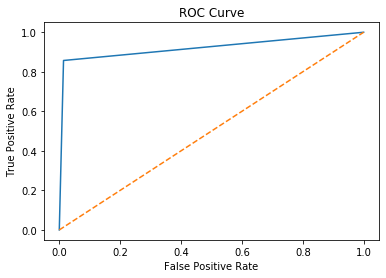

In [194]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_smote_2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [195]:
roc_auc_score(y_test, pred_test_smote_2)

0.9216162372377201

- Dip in performance can be observed.

In [196]:
# XGBoost
xgb_b_3 = XGBClassifier()

params = {'n_estimators' : [10, 20, 30, 40, 50],
          'max_depth' : [3, 6, 9, 12, 15],
          'min_child_weight' : [1, 3, 5, 7, 9]}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

model_cv = RandomizedSearchCV(estimator = xgb_b_3,
                              scoring = 'recall',
                              param_distributions = params,
                              cv = folds,
                              return_train_score = True,
                              verbose = 1,
                              random_state=0)

model_cv.fit(X_smote, y_smote)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 78.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_ch...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           va

In [197]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,26.069100,0.265295,0.083581,0.007069,40,3,3,"{'n_estimators': 40, 'min_child_weight': 3, 'm...",0.977841,0.975556,0.978765,0.978237,0.979512,0.980215,0.980040,0.980611,0.981842,0.977534,0.979015,0.001717,9,0.979146,0.976713,0.978867,0.978608,0.980890,0.980176,0.979180,0.979414,0.982673,0.978936,0.979460,0.001482
1,20.441126,0.272690,0.074680,0.006169,10,1,9,"{'n_estimators': 10, 'min_child_weight': 1, 'm...",0.997846,0.998725,0.998681,0.997538,0.998241,0.998066,0.998461,0.998329,0.998285,0.997494,0.998167,0.000409,7,0.998686,0.998808,0.999057,0.998593,0.999062,0.998344,0.998759,0.998622,0.998705,0.998378,0.998702,0.000228
2,50.736800,0.176493,0.102881,0.010246,40,7,6,"{'n_estimators': 40, 'min_child_weight': 7, 'm...",0.999297,0.999341,0.999560,0.999428,0.999780,0.999516,0.999604,0.999868,0.999384,0.999560,0.999534,0.000175,6,0.999682,0.999702,0.999590,0.999604,0.999873,0.999619,0.999722,0.999614,0.999658,0.999736,0.999680,0.000081
3,32.952820,0.413471,0.087460,0.007525,50,9,3,"{'n_estimators': 50, 'min_child_weight': 9, 'm...",0.983733,0.986283,0.987206,0.988173,0.987514,0.988745,0.987909,0.989316,0.986986,0.987470,0.987334,0.001457,8,0.985789,0.987084,0.987177,0.988623,0.988183,0.988286,0.987245,0.987753,0.988051,0.988095,0.987629,0.000785
4,69.468769,0.661004,0.104221,0.009042,40,5,9,"{'n_estimators': 40, 'min_child_weight': 5, 'm...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


*Looking at the best parameter values and formulating the model based on that...*

In [198]:
model_cv.best_params_

{'n_estimators': 40, 'min_child_weight': 5, 'max_depth': 9}

In [199]:
xgb_b_3 = XGBClassifier(n_estimators = 40,
                        min_child_weight = 5,
                        max_depth = 9)

xgb_b_3.fit(X_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

*Making the predictions and evaluating the metrics..*

In [200]:
pred_train_smote_3 = xgb_b_3.predict(X_smote)

In [201]:
print(accuracy_score(y_smote, pred_train_smote_3))
print(precision_score(y_smote, pred_train_smote_3))
print(recall_score(y_smote, pred_train_smote_3))
print(f1_score(y_smote, pred_train_smote_3))

0.9998856896650268
0.9997714315855175
1.0
0.9998857027303859


In [202]:
confusion_matrix(y_smote, pred_train_smote_3)

array([[227399,     52],
       [     0, 227451]], dtype=int64)

- Near Perfect results on smote oversampled train data.

In [203]:
pred_test_smote_3 = xgb_b_3.predict(X_test)

In [204]:
print(accuracy_score(y_test, pred_test_smote_3))
print(precision_score(y_test, pred_test_smote_3))
print(recall_score(y_test, pred_test_smote_3))
print(f1_score(y_test, pred_test_smote_3))

0.9989466661985184
0.6461538461538462
0.8571428571428571
0.736842105263158


In [205]:
confusion_matrix(y_test, pred_test_smote_3)

array([[56818,    46],
       [   14,    84]], dtype=int64)

- There is a dip in the performance with respect to train data but overall in comparison with other models XGBoost performs better.

*Taking a look at the ROC metrics..*

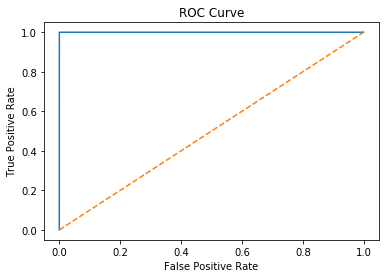

In [206]:
fpr, tpr, thresh = roc_curve(y_smote, pred_train_smote_3)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [207]:
roc_auc_score(y_smote, pred_train_smote_3)

0.9998856896650268

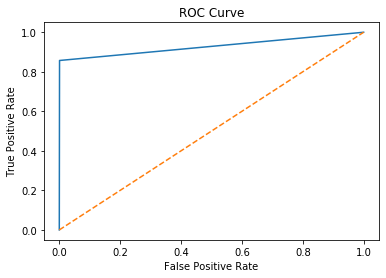

In [208]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_smote_3)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [209]:
roc_auc_score(y_test, pred_test_smote_3)

0.928166954739127

- The ROC confirms as well that XGBoost has performed well.

***ADASYN***

In [210]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state = 0)

X_adasyn, y_adasyn = adasyn.fit_sample(X_train, y_train)

*Taking a look at the shape and the class distribution of adasyn sampled data as follows...*

In [211]:
X_adasyn.shape

(454845, 29)

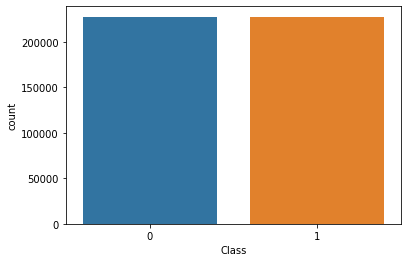

In [212]:
sns.countplot(y_adasyn)
plt.show()

In [213]:
y_adasyn.value_counts()

0    227451
1    227394
Name: Class, dtype: int64

- Perfectly balanced !

In [214]:
# Logistic Regression
logreg_b_4 = LogisticRegression()

params = {'C' : [0.05, 0.1, 0.2, 0.4, 0.5, 0.8, 1, 2, 4]}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

model_cv = GridSearchCV(estimator = logreg_b_4,
                        scoring = 'recall',
                        cv = folds,
                        param_grid = params,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(X_adasyn, y_adasyn)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.2, 0.4, 0.5, 0.8, 1, 2, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [215]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.911926,0.110740,0.01716,4.679990e-03,0.05,{'C': 0.05},0.885395,0.879815,0.882146,0.884477,0.883026,0.877963,0.883768,0.880602,0.884340,0.881305,0.882284,0.002237,9,0.882285,0.882660,0.882343,0.882338,0.882162,0.882539,0.881948,0.882954,0.882534,0.882593,0.882436,0.000268
1,1.920003,0.079260,0.01716,4.680038e-03,0.1,{'C': 0.1},0.885659,0.880079,0.882278,0.884565,0.883026,0.878139,0.883856,0.880953,0.884516,0.881437,0.882451,0.002210,8,0.882461,0.882836,0.882602,0.882485,0.882333,0.882734,0.882099,0.883115,0.882705,0.882773,0.882614,0.000271
2,1.954386,0.127929,0.01716,4.679990e-03,0.2,{'C': 0.2},0.885747,0.880123,0.882366,0.884697,0.883157,0.878359,0.884076,0.881041,0.884648,0.881481,0.882569,0.002210,7,0.882529,0.882968,0.882714,0.882553,0.882402,0.882813,0.882143,0.883223,0.882773,0.882852,0.882697,0.000289
3,1.933143,0.098495,0.01560,1.862109e-07,0.4,{'C': 0.4},0.885835,0.880255,0.882410,0.884785,0.883245,0.878359,0.884076,0.881085,0.884735,0.881569,0.882635,0.002219,6,0.882612,0.883027,0.882792,0.882563,0.882445,0.882881,0.882187,0.883272,0.882817,0.882847,0.882744,0.000291
4,1.926243,0.091177,0.01560,1.784161e-07,0.5,{'C': 0.5},0.885879,0.880299,0.882410,0.884785,0.883245,0.878359,0.884076,0.881085,0.884735,0.881569,0.882644,0.002221,4,0.882627,0.883042,0.882788,0.882573,0.882450,0.882881,0.882192,0.883287,0.882817,0.882861,0.882752,0.000293


In [216]:
model_cv.best_params_

{'C': 4}

*Making a model with C = 4 and making predictions..*

In [217]:
logreg_b_4 = LogisticRegression(C = 4)
logreg_b_4.fit(X_adasyn, y_adasyn)

LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
pred_train_adasyn_1 = logreg_b_4.predict(X_adasyn)

*Calculating the metrics on train data..*

In [219]:
print(accuracy_score(y_adasyn, pred_train_adasyn_1))
print(precision_score(y_adasyn, pred_train_adasyn_1))
print(recall_score(y_adasyn, pred_train_adasyn_1))
print(f1_score(y_adasyn, pred_train_adasyn_1))

0.8957886752630017
0.9063290110525175
0.8827893436062517
0.8944043200662981


In [220]:
confusion_matrix(y_adasyn, pred_train_adasyn_1)

array([[206704,  20747],
       [ 26653, 200741]], dtype=int64)

- Quite a good performance on ADASYN oversampled train data.

*Making the predictions on the test set and calculating the metrics..*

In [221]:
pred_test_adasyn_1 = logreg_b_4.predict(X_test)

In [222]:
print(accuracy_score(y_test, pred_test_adasyn_1))
print(precision_score(y_test, pred_test_adasyn_1))
print(recall_score(y_test, pred_test_adasyn_1))
print(f1_score(y_test, pred_test_adasyn_1))

0.9074821811031916
0.017357222844344905
0.9489795918367347
0.03409090909090909


- Same case of low precision on test data but that's because of the very high number of zeroes present in the test data and some of them getting misclassified as 1 as already explained earlier.

In [223]:
confusion_matrix(y_test, pred_test_adasyn_1)

array([[51599,  5265],
       [    5,    93]], dtype=int64)

*Looking at ROC..*

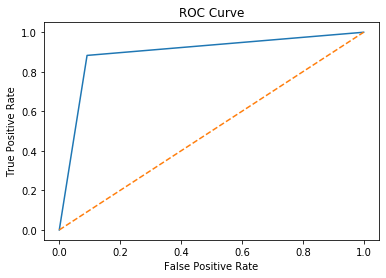

In [224]:
fpr, tpr, thresh = roc_curve(y_adasyn, pred_train_adasyn_1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [225]:
roc_auc_score(y_adasyn, pred_train_adasyn_1)

0.8957870464244729

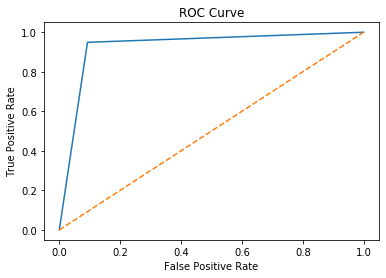

In [226]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_adasyn_1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [227]:
roc_auc_score(y_test, pred_test_adasyn_1)

0.9281951279386262

- The performance of the model is higher on the test set as compared to train set !

In [229]:
# Decision Tree
dtree_b_4 = DecisionTreeClassifier()

params = {'max_depth' : [3, 5, 7, 9, 11],
          'max_features' : [1, 3, 5, 7, 9],
          'min_samples_leaf' : [1, 3, 5, 7, 9],
          'criterion' : ['gini', 'entropy']}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

model_cv = RandomizedSearchCV(estimator = dtree_b_4,
                              scoring = 'recall',
                              cv = folds,
                              param_distributions = params,
                              return_train_score = True,
                              verbose = 1,
                              random_state=0)

model_cv.fit(X_adasyn, y_adasyn)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
     

In [230]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.142922,0.088359,0.02134,0.005878,1,1,11,entropy,"{'min_samples_leaf': 1, 'max_features': 1, 'ma...",0.931263,0.893228,0.881398,0.911697,0.857256,0.942873,0.937376,0.872906,0.948371,0.942478,0.911885,0.031677,5,0.933136,0.898091,0.879377,0.910292,0.858591,0.943422,0.937055,0.877096,0.949183,0.942474,0.912872,0.031140
1,4.884192,0.120764,0.02184,0.007642,5,9,11,gini,"{'min_samples_leaf': 5, 'max_features': 9, 'ma...",0.968336,0.990545,0.992524,0.998813,0.981047,0.991249,0.994635,0.998505,0.989577,0.995602,0.990083,0.008722,1,0.964027,0.990667,0.992983,0.999345,0.982194,0.991195,0.995255,0.998998,0.990477,0.995788,0.990093,0.009879
2,3.314726,0.058299,0.02028,0.007149,5,7,9,gini,"{'min_samples_leaf': 5, 'max_features': 7, 'ma...",0.969832,0.944503,0.988478,0.970229,0.971592,0.972030,0.970183,0.968380,0.974097,0.958266,0.968759,0.010677,2,0.970247,0.945664,0.989294,0.970829,0.971366,0.975256,0.969519,0.969559,0.974963,0.960328,0.969703,0.010547
3,1.542283,0.012042,0.01872,0.006240,5,3,5,entropy,"{'min_samples_leaf': 5, 'max_features': 3, 'ma...",0.733981,0.830167,0.776385,0.880431,0.740413,0.570957,0.710014,0.849642,0.746339,0.754299,0.759263,0.082001,9,0.732692,0.834794,0.774473,0.881410,0.738959,0.567609,0.709565,0.854902,0.746520,0.753375,0.759430,0.083976
4,0.635021,0.009884,0.02184,0.007643,9,1,5,entropy,"{'min_samples_leaf': 9, 'max_features': 1, 'ma...",0.671402,0.728012,0.468777,0.680607,0.837115,0.536699,0.791460,0.711861,0.465368,0.812173,0.670347,0.129714,10,0.670279,0.734845,0.464897,0.681545,0.835117,0.537866,0.789416,0.711622,0.465417,0.814615,0.670562,0.130340


In [231]:
model_cv.best_params_

{'min_samples_leaf': 5,
 'max_features': 9,
 'max_depth': 11,
 'criterion': 'gini'}

In [232]:
dtree_b_4 = DecisionTreeClassifier(min_samples_leaf = 5,
                                   max_features = 9,
                                   max_depth = 11,
                                   criterion = 'gini')

dtree_b_4.fit(X_adasyn, y_adasyn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

*Making the predictions on train data and calculating the metrics..*

In [233]:
pred_train_adasyn_2 = dtree_b_4.predict(X_adasyn)

In [234]:
print(accuracy_score(y_adasyn, pred_train_adasyn_2))
print(precision_score(y_adasyn, pred_train_adasyn_2))
print(recall_score(y_adasyn, pred_train_adasyn_2))
print(f1_score(y_adasyn, pred_train_adasyn_2))

0.9834778880717607
0.9702469299502547
0.9975417117426142
0.9837050207617334


In [235]:
confusion_matrix(y_adasyn, pred_train_adasyn_2)

array([[220495,   6956],
       [   559, 226835]], dtype=int64)

- High performance on train data.

*Making the predictions on test data and calculating the metrics..*

In [236]:
pred_test_adasyn_2 = dtree_b_4.predict(X_test)

In [237]:
print(accuracy_score(y_test, pred_test_adasyn_2))
print(precision_score(y_test, pred_test_adasyn_2))
print(recall_score(y_test, pred_test_adasyn_2))
print(f1_score(y_test, pred_test_adasyn_2))

0.9684702082089814
0.04501607717041801
0.8571428571428571
0.0855397148676171


In [238]:
confusion_matrix(y_test, pred_test_adasyn_2)

array([[55082,  1782],
       [   14,    84]], dtype=int64)

- Some dip in Recall value. For precision, same case persists.

*Looking at the ROC metrics*

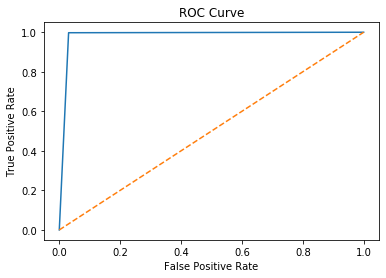

In [239]:
fpr, tpr, thresh = roc_curve(y_adasyn, pred_train_adasyn_2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [240]:
roc_auc_score(y_adasyn, pred_train_adasyn_2)

0.9834796502929627

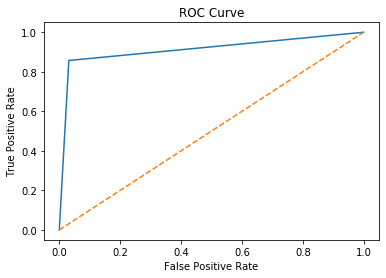

In [241]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_adasyn_2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [242]:
roc_auc_score(y_test, pred_test_adasyn_2)

0.9129024640244393

- ROC too confirms the dip in performace with respect to the test set.

In [244]:
# XGBoost

xgb_b_4 = XGBClassifier()

params = {'n_estimators' : [10, 20, 30, 40, 50],
          'max_depth' : [3, 6, 9, 12, 15],
          'min_child_weight' : [1, 3, 5, 7, 9]}

folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

model_cv = RandomizedSearchCV(estimator = xgb_b_4,
                              scoring = 'recall',
                              cv = folds,
                              param_distributions = params,
                              return_train_score = True,
                              verbose = 1,
                              random_state=0)

model_cv.fit(X_adasyn, y_adasyn)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 108.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_ch...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           va

In [245]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,28.821195,1.893238,0.095724,0.009330,40,3,3,"{'n_estimators': 40, 'min_child_weight': 3, 'm...",0.989753,0.987687,0.991513,0.988962,0.993008,0.986895,0.989973,0.988038,0.991820,0.992656,0.990031,0.002041,9,0.989959,0.989450,0.991371,0.987931,0.992074,0.988693,0.990623,0.989138,0.992040,0.992773,0.990405,0.001543
1,21.720442,0.732560,0.085005,0.008450,10,1,9,"{'n_estimators': 10, 'min_child_weight': 1, 'm...",0.999428,0.998769,0.999472,0.999208,0.999736,0.999208,0.999032,0.999120,0.998989,0.999164,0.999213,0.000261,7,0.999502,0.999125,0.999560,0.999140,0.999223,0.999199,0.999345,0.999384,0.999282,0.999252,0.999301,0.000139
2,51.070181,2.213616,0.101365,0.008201,40,7,6,"{'n_estimators': 40, 'min_child_weight': 7, 'm...",0.999956,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999996,0.000013,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999990,1.000000,1.000000,1.000000,0.999999,0.000003
3,32.039318,0.353140,0.085605,0.005463,50,9,3,"{'n_estimators': 50, 'min_child_weight': 9, 'm...",0.995910,0.992172,0.994811,0.995646,0.995822,0.993711,0.995998,0.995338,0.996922,0.996306,0.995264,0.001320,8,0.995900,0.993819,0.994855,0.994527,0.995065,0.994674,0.995944,0.995773,0.997220,0.996223,0.995400,0.000942
4,71.324508,0.725981,0.118246,0.012787,40,5,9,"{'n_estimators': 40, 'min_child_weight': 5, 'm...",0.999956,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999996,0.000013,1,1.000000,1.000000,0.999995,1.000000,0.999995,1.000000,1.000000,0.999995,1.000000,0.999995,0.999998,0.000002


In [246]:
model_cv.best_params_

{'n_estimators': 40, 'min_child_weight': 7, 'max_depth': 6}

*Formulating a model based on these values..*

In [247]:
xgb_b_4 = XGBClassifier(n_estimators = 40,
                        min_child_weight = 7,
                        max_depth = 6)

xgb_b_4.fit(X_adasyn, y_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

*Making predictions and calculating metrics...*

In [248]:
pred_train_adasyn_3 = xgb_b_4.predict(X_adasyn)

In [249]:
print(accuracy_score(y_adasyn, pred_train_adasyn_3))
print(precision_score(y_adasyn, pred_train_adasyn_3))
print(recall_score(y_adasyn, pred_train_adasyn_3))
print(f1_score(y_adasyn, pred_train_adasyn_3))

0.9983247040200508
0.9966601798769263
1.0
0.9983272966743497


In [250]:
confusion_matrix(y_adasyn, pred_train_adasyn_3)

array([[226689,    762],
       [     0, 227394]], dtype=int64)

- Near Perfect results on ADASYN sampled train data.

*Making predictions and calculations on test data..*

In [251]:
pred_test_adasyn_3 = xgb_b_4.predict(X_test)

In [252]:
print(accuracy_score(y_test, pred_test_adasyn_3))
print(precision_score(y_test, pred_test_adasyn_3))
print(recall_score(y_test, pred_test_adasyn_3))
print(f1_score(y_test, pred_test_adasyn_3))

0.9963484428215301
0.3076923076923077
0.8979591836734694
0.4583333333333334


In [253]:
confusion_matrix(y_test, pred_test_adasyn_3)

array([[56666,   198],
       [   10,    88]], dtype=int64)

- Dip in performance has happened on the test data but as usual, XGBoost is giving better precision compared to other models trained on sampled data.

*Looking at the ROC metrics..*

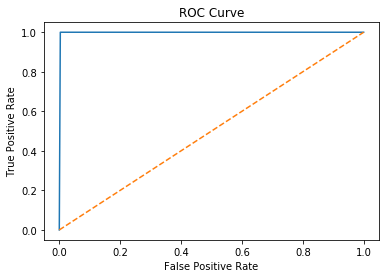

In [254]:
fpr, tpr, thresh = roc_curve(y_adasyn, pred_train_adasyn_3)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [255]:
roc_auc_score(y_adasyn, pred_train_adasyn_3)

0.9983249139375074

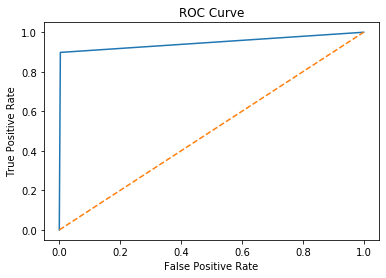

In [256]:
fpr, tpr, thresh = roc_curve(y_test, pred_test_adasyn_3)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [257]:
roc_auc_score(y_test, pred_test_adasyn_3)

0.9472385957759581

- Dip in performance is confirmed from the ROC as well.

### Conclusion


- *Various models have been tested, both on the unbalanced data and balanced data using various sampling techniques. The various metrics namely the Accuracy, Precision, Recall and the Area under ROC has been achieved in comparable values using models trained on unbalanced data that was provided to us. However, training models gave us good values of metrics as well except Precision. The value of Precision in all the models trained on balanced data has been very low. The reason for that is the high number of negative classes (0) present in the test data. Even though a relatively small portion negative classes were misclassified as positive class (1) but even that number was significantly more than the total numbers of positive classes resulting in poor Precision.*


- *The main metric to consider as per the requirement is the Recall. All the models have fetched good values for Recall.*


- *The model that we are adjusting as the best model is the Logistic Regression formulated on the ADASYN sampled data `log_reg_b_4` . It gave us a very high value of Recall on the test data. Of course, the precision was low but that is because of the very high number of negative classes present in the test data. The main point is that we are able to capture the positive classes very well using this model.*

*Let's take  look at the most important predictors using the Logistic Regression `log_reg_b_4` model.*

In [273]:
important = pd.DataFrame(columns = ['Features', 'Coefficients'])
important['Features'] = list(X_train.columns)
important['Coefficients'] = logreg_b_4.coef_[0]
important.sort_values(by = 'Coefficients', ascending = False, inplace = True)
important

,Features,Coefficients
3,V4,2.280883
10,V11,1.080404
0,V1,0.675256
21,V22,0.377433
27,V28,0.365584
20,V21,0.266940
18,V19,0.235110
12,V13,0.093913
26,V27,0.092647
4,V5,0.060158


- The most important predictor comes out to be `V4` with quite a high coefficient value followed by `V11` and `V1` on second and third spot respectively and other variables in the order of decreasing coefficient.